# Comparison 2 - Loadsol vs Bertec

- Comparing vGRF of Loadsol vs Bertec
- Non-Exo only
- Paired t-test

TLDR:
- Significant differences between loadsol and bertec in all conditions
- Consistent trend across all conditions: p<0.05 at touchdown region (possibily due to different frequency? loadsol = 100hz vs Bertec = 1000hz) & p<0.05 after 80% gait cycle

Not the most optimize way to write, but it works for now. :)

# 1. Import packages

In [152]:
import os
import spm1d
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks


In [16]:
path = r'C:\Users\14000\Downloads\Exoskeletal study\Exoskeletal - SPM Analysis\Excel files' # Set directory where Excel file is located
os.chdir(path) # Set it to working directory
os.getcwd() # Check current directory to confirm

'C:\\Users\\14000\\Downloads\\Exoskeletal study\\Exoskeletal - SPM Analysis\\Excel files'

In [80]:
path = r'C:\Users\14000\Downloads\Exoskeletal study\Data (Dynamic only)\Loadsol\new' # Set directory where Excel file is located
os.chdir(path) # Set it to working directory|
os.getcwd() # Check current directory to confirm

'C:\\Users\\14000\\Downloads\\Exoskeletal study\\Data (Dynamic only)\\Loadsol\\new'

In [45]:
def fix_df(df):
    df.iloc[:,1] = df.iloc[:,1].str.replace('Non_Exo', 'Non-Exo')
    df.iloc[:,3] = df.iloc[:,3].str.replace('Incline', 'Inclined')
    df.iloc[:,3] = df.iloc[:,3].str.replace('Decline', 'Declined')
    return df

def swap_column(df):
    tocopy = df.iloc[:, 2].copy()
    df.iloc[:,2] = df.iloc[:,3].copy()
    df.iloc[:,3] = tocopy
    return df

In [46]:
# Read Excel - Left
loadsol_left = pd.read_excel("Mean_Data_All_Participant_Updated.xlsx", sheet_name="Fz_Left", header=None)
# print(loadsol_left)
bertec_left = fix_df(swap_column(pd.read_excel("Mean_Data_All_Participant_BFO_7may.xlsx", sheet_name="Fz_Left", header=None)))
# print(bertec_left)

# Read Excel - Right
loadsol_right = pd.read_excel("Mean_Data_All_Participant_Updated.xlsx", sheet_name="Fz_Right", header=None)
# print(loadsol_right)
bertec_right = fix_df(swap_column(pd.read_excel("Mean_Data_All_Participant_BFO_7may.xlsx", sheet_name="Fz_Right", header=None)))
# print(bertec_right)

## Left

In [48]:
# Function to filter dataset
def filter_dataset(df, equipment, mass, incline_condition):
    index = (df[1]==equipment)&(df[2]==mass)&(df[3]==incline_condition)
    df2 = df[index]
    df2 = df2.sort_values(df2.columns[0], ascending=True)
    print(f"{equipment} {mass} {incline_condition}: {df2[0].nunique()} unique rows")
    df2 = df2.iloc[:,4:]
    print(f"{equipment} {mass} {incline_condition}: {df2.shape[1]} columns\n")
    df2.columns = range(len(df2.columns))
    return df2

### Loadsol: Non-Exo 25kg

In [49]:
# Left - Non-Exo data
# Separate into load and conditions
loadsol_left_non_exo_25kg_flat = filter_dataset(loadsol_left, 'Non-Exo', '25kg', 'Flat')
loadsol_left_non_exo_25kg_incline = filter_dataset(loadsol_left, 'Non-Exo', '25kg', 'Inclined')
loadsol_left_non_exo_25kg_decline = filter_dataset(loadsol_left, 'Non-Exo', '25kg', 'Declined')

Non-Exo 25kg Flat: 8 unique rows
Non-Exo 25kg Flat: 101 columns

Non-Exo 25kg Inclined: 8 unique rows
Non-Exo 25kg Inclined: 101 columns

Non-Exo 25kg Declined: 8 unique rows
Non-Exo 25kg Declined: 101 columns



### Bertec: Non-Exo 25kg

In [50]:
# Left - Non-Exo data
# Separate into load and conditions
bertec_left_non_exo_25kg_flat = filter_dataset(bertec_left, 'Non-Exo', '25kg', 'Flat')
bertec_left_non_exo_25kg_incline = filter_dataset(bertec_left, 'Non-Exo', '25kg', 'Inclined')
bertec_left_non_exo_25kg_decline = filter_dataset(bertec_left, 'Non-Exo', '25kg', 'Declined')

Non-Exo 25kg Flat: 8 unique rows
Non-Exo 25kg Flat: 101 columns

Non-Exo 25kg Inclined: 8 unique rows
Non-Exo 25kg Inclined: 101 columns

Non-Exo 25kg Declined: 8 unique rows
Non-Exo 25kg Declined: 101 columns



### Loadsol: Non-Exo 35kg

In [51]:
# Left - Non-Exo data
# Separate into load and conditions
loadsol_left_non_exo_35kg_flat = filter_dataset(loadsol_left, 'Non-Exo', '35kg', 'Flat')
loadsol_left_non_exo_35kg_incline = filter_dataset(loadsol_left, 'Non-Exo', '35kg', 'Inclined')
loadsol_left_non_exo_35kg_decline = filter_dataset(loadsol_left, 'Non-Exo', '35kg', 'Declined')

Non-Exo 35kg Flat: 8 unique rows
Non-Exo 35kg Flat: 101 columns

Non-Exo 35kg Inclined: 8 unique rows
Non-Exo 35kg Inclined: 101 columns

Non-Exo 35kg Declined: 8 unique rows
Non-Exo 35kg Declined: 101 columns



### Bertec: Non-Exo 35kg

In [52]:
# Left - Non-Exo data
# Separate into load and conditions
bertec_left_non_exo_35kg_flat = filter_dataset(bertec_left, 'Non-Exo', '35kg', 'Flat')
bertec_left_non_exo_35kg_incline = filter_dataset(bertec_left, 'Non-Exo', '35kg', 'Inclined')
bertec_left_non_exo_35kg_decline = filter_dataset(bertec_left, 'Non-Exo', '35kg', 'Declined')

Non-Exo 35kg Flat: 8 unique rows
Non-Exo 35kg Flat: 101 columns

Non-Exo 35kg Inclined: 8 unique rows
Non-Exo 35kg Inclined: 101 columns

Non-Exo 35kg Declined: 8 unique rows
Non-Exo 35kg Declined: 101 columns



## Right

### Loadsol: Non-Exo 25kg

In [53]:
# Right - Non-Exo data
# Separate into load and conditions
loadsol_right_non_exo_25kg_flat = filter_dataset(loadsol_right, 'Non-Exo', '25kg', 'Flat')
loadsol_right_non_exo_25kg_incline = filter_dataset(loadsol_right, 'Non-Exo', '25kg', 'Inclined')
loadsol_right_non_exo_25kg_decline = filter_dataset(loadsol_right, 'Non-Exo', '25kg', 'Declined')

Non-Exo 25kg Flat: 8 unique rows
Non-Exo 25kg Flat: 101 columns

Non-Exo 25kg Inclined: 8 unique rows
Non-Exo 25kg Inclined: 101 columns

Non-Exo 25kg Declined: 8 unique rows
Non-Exo 25kg Declined: 101 columns



### Bertec: Non-Exo 25kg

In [54]:
# Right - Non-Exo data
# Separate into load and conditions
bertec_right_non_exo_25kg_flat = filter_dataset(bertec_right, 'Non-Exo', '25kg', 'Flat')
bertec_right_non_exo_25kg_incline = filter_dataset(bertec_right, 'Non-Exo', '25kg', 'Inclined')
bertec_right_non_exo_25kg_decline = filter_dataset(bertec_right, 'Non-Exo', '25kg', 'Declined')

Non-Exo 25kg Flat: 8 unique rows
Non-Exo 25kg Flat: 101 columns

Non-Exo 25kg Inclined: 8 unique rows
Non-Exo 25kg Inclined: 101 columns

Non-Exo 25kg Declined: 8 unique rows
Non-Exo 25kg Declined: 101 columns



### Loadsol: Non-Exo 35kg

In [55]:
# Right - Non-Exo data
# Separate into load and conditions
loadsol_right_non_exo_35kg_flat = filter_dataset(loadsol_right, 'Non-Exo', '35kg', 'Flat')
loadsol_right_non_exo_35kg_incline = filter_dataset(loadsol_right, 'Non-Exo', '35kg', 'Inclined')
loadsol_right_non_exo_35kg_decline = filter_dataset(loadsol_right, 'Non-Exo', '35kg', 'Declined')

Non-Exo 35kg Flat: 8 unique rows
Non-Exo 35kg Flat: 101 columns

Non-Exo 35kg Inclined: 8 unique rows
Non-Exo 35kg Inclined: 101 columns

Non-Exo 35kg Declined: 8 unique rows
Non-Exo 35kg Declined: 101 columns



### Bertec: Non-Exo 35kg

In [56]:
# Right - Non-Exo data
# Separate into load and conditions
bertec_right_non_exo_35kg_flat = filter_dataset(bertec_right, 'Non-Exo', '35kg', 'Flat')
bertec_right_non_exo_35kg_incline = filter_dataset(bertec_right, 'Non-Exo', '35kg', 'Inclined')
bertec_right_non_exo_35kg_decline = filter_dataset(bertec_right, 'Non-Exo', '35kg', 'Declined')

Non-Exo 35kg Flat: 8 unique rows
Non-Exo 35kg Flat: 101 columns

Non-Exo 35kg Inclined: 8 unique rows
Non-Exo 35kg Inclined: 101 columns

Non-Exo 35kg Declined: 8 unique rows
Non-Exo 35kg Declined: 101 columns



## Unnormalised data

In [345]:
# Read Excel - Left
loadsol_left_unnormalised = pd.read_excel("Mean_Data_All_Participant_Loadsol_Updated_unnormalised.xlsx", sheet_name="Fz_Left", header=None)

# Read Excel - Right
loadsol_right_unnormalised = pd.read_excel("Mean_Data_All_Participant_Loadsol_Updated_unnormalised.xlsx", sheet_name="Fz_Right", header=None)

# Read Excel - Left
bertec_left_unnormalised = fix_df(swap_column(pd.read_excel("Mean_Data_All_Participant_Bertec_Unnormalised.xlsx", sheet_name="Fz_Left", header=None)))

# Read Excel - Right
bertec_right_unnormalised = fix_df(swap_column(pd.read_excel("Mean_Data_All_Participant_Bertec_Unnormalised.xlsx", sheet_name="Fz_Right", header=None)))

In [346]:
def calculate_peaks_in_each_condition(df):
    impact_peaks = []
    active_peaks = []
    df = df.iloc[:,4:]
    df.columns = range(len(df.columns))
    for i in range(0,df.shape[0]):
        index, _ = find_peaks(df.iloc[i,:], height=700)
        impact_peak = df.iloc[i,index[0]]
        active_peak = df.iloc[i,index[-1]]

        impact_peaks.append(impact_peak)
        active_peaks.append(active_peak)

    df2 = pd.DataFrame({
        'Impact':impact_peaks,
        'Active':active_peaks
    })
    return df2

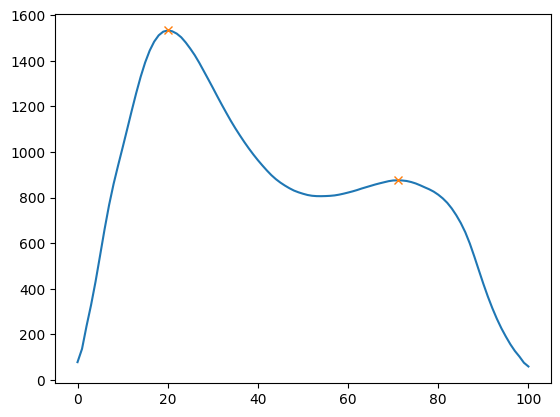

In [347]:
i=1
index, _ = find_peaks(df.iloc[i,:], height=700)
plt.plot(df.iloc[i,:])
plt.plot(index, df.iloc[i,:][index], "x")
plt.show()

In [348]:
loadsol_left_peak_unnormalised = calculate_peaks_in_each_condition(loadsol_left_unnormalised)
loadsol_right_peak_unnormalised = calculate_peaks_in_each_condition(loadsol_right_unnormalised)
bertec_left_peak_unnormalised = calculate_peaks_in_each_condition(bertec_left_unnormalised)
bertec_right_peak_unnormalised = calculate_peaks_in_each_condition(bertec_right_unnormalised)

In [349]:
# pd.set_option('display.max_rows', 10)

In [350]:
loadsol_left_unnormalised

0        1     2         3          4           5           6    \
0    P1  Non-Exo  35kg  Inclined  85.267676  135.279203  169.212258   
1    P1  Non-Exo  35kg  Declined  77.947513  136.206808  236.244243   
2    P1  Non-Exo  35kg      Flat  73.791271  136.415339  223.365646   
3    P1  Non-Exo  25kg  Inclined  73.388590  127.671411  171.549246   
4    P1  Non-Exo  25kg  Declined  75.351660  136.933071  245.613765   
..   ..      ...   ...       ...        ...         ...         ...   
97   P8  Non-Exo  35kg  Declined  62.430521   97.703921  170.549793   
98   P8  Non-Exo  35kg      Flat  67.151167  108.278856  168.907599   
99   P8  Non-Exo  25kg  Inclined  56.331227   93.307079   94.002363   
100  P8  Non-Exo  25kg  Declined  66.879675  115.562781  193.421318   
101  P8  Non-Exo  25kg      Flat  65.897669  112.377719  177.231139   

            7           8           9    ...         95          96   \
0    196.982858  234.949912  275.153283  ...  421.966418  376.844587   
1    328.148964  431.271222  545.301819  ...  365.756481  314.580056   
2    290.627734  368.575248  462.363939  ...  492.392427  428.560317   
3    205.367249  253.466042  308.223451  ...  379.303817  337.949929   
4    342.408181  432.860374  531.207988  ...  356.926265  307.044171   
..          ...         ...         ...  ...         ...         ...   
97   252.944228  344.165456  444.908761  ...  525.270319  458.145639   
98   228.119288  289.569128  341.629326  ...  819.772650  749.913188   
99    85.956937   78.692877   75.911742  ...  695.813490  643.865861   
100  276.352115  369.645950  473.819321  ...  528.375920  470.740208   
101  235.674704  302.203427  373.049530  ...  759.382290  695.217533   

            97          98          99          100         101         102  \
0    330.665719  284.422134  238.991102  193.969942  153.076260  116.676785   
1    268.077605  226.558330  189.928751  156.096367  126.844477  102.568573   
2    368.086278  311.387372  259.010095  210.041223  164.336943  125.133083   
3    295.912921  256.284808  217.282288  178.696831  143.634832  112.685930   
4    262.396928  221.877165  185.945087  153.759380  125.981590  102.489475   
..          ...         ...         ...         ...         ...         ...   
97   388.107389  317.691700  250.957703  192.368459  145.307682  109.258875   
98   668.134575  573.026380  468.634491  360.713210  260.771137  177.436413   
99   583.819832  515.913786  443.200349  360.925106  276.292519  193.017391   
100  409.634699  345.158719  280.788687  219.054112  164.484270  121.237621   
101  622.510718  539.268698  447.199886  351.926147  259.188538  179.297125   

            103        104  
0     80.219784  52.800811  
1     75.373232  58.979806  
2     84.332881  58.389447  
3     82.621488  58.917246  
4     76.343980  60.552418  
..          ...        ...  
97    76.103773  58.356158  
98   104.537567  62.480184  
99   118.694869  56.372282  
100   83.268506  59.661305  
101  107.431272  64.684565  

[102 rows x 105 columns]

In [351]:
loadsol_left_peak_unnormalised

Impact       Active
0     841.603039   989.947799
1    1532.488378   875.255656
2    1387.307539  1100.325505
3     884.172161   948.888731
4    1506.529842   805.217945
..           ...          ...
97   1488.105878   887.314500
98   1137.682868  1173.903840
99    811.363028   912.278498
100  1492.939755   915.854243
101  1072.392413  1069.015320

[102 rows x 2 columns]

In [283]:
file = 'Impact_Active_Peak.xlsx'
with pd.ExcelWriter(file) as writer:
# writer.book = openpyxl.load_workbook(file)
    loadsol_left_peak_unnormalised.to_excel(writer,sheet_name='Loadsol_Left')
    loadsol_right_peak_unnormalised.to_excel(writer, sheet_name="Loadsol_Right")
    bertec_left_peak_unnormalised.to_excel(writer, sheet_name="Bertec_Left")
    bertec_right_peak_unnormalised.to_excel(writer, sheet_name="Bertec_Right")

In [ ]:
# Filter by condition - Loadsol Left
loadsol_left_non_exo_25kg_flat_unnormalised = filter_dataset(loadsol_left_unnormalised, 'Non-Exo', '25kg', 'Flat')
loadsol_left_non_exo_25kg_incline_unnormalised = filter_dataset(loadsol_left_unnormalised, 'Non-Exo', '25kg', 'Inclined')
loadsol_left_non_exo_25kg_decline_unnormalised = filter_dataset(loadsol_left_unnormalised, 'Non-Exo', '25kg', 'Declined')

loadsol_left_non_exo_35kg_flat_unnormalised = filter_dataset(loadsol_left_unnormalised, 'Non-Exo', '35kg', 'Flat')
loadsol_left_non_exo_35kg_incline_unnormalised = filter_dataset(loadsol_left_unnormalised, 'Non-Exo', '35kg', 'Inclined')
loadsol_left_non_exo_35kg_decline_unnormalised = filter_dataset(loadsol_left_unnormalised, 'Non-Exo', '35kg', 'Declined')

# Filter by condition - Loadsol Right
loadsol_right_non_exo_25kg_flat_unnormalised = filter_dataset(loadsol_right_unnormalised, 'Non-Exo', '25kg', 'Flat')
loadsol_right_non_exo_25kg_incline_unnormalised = filter_dataset(loadsol_right_unnormalised, 'Non-Exo', '25kg', 'Inclined')
loadsol_right_non_exo_25kg_decline_unnormalised = filter_dataset(loadsol_right_unnormalised, 'Non-Exo', '25kg', 'Declined')

loadsol_right_non_exo_35kg_flat_unnormalised = filter_dataset(loadsol_right_unnormalised, 'Non-Exo', '35kg', 'Flat')
loadsol_right_non_exo_35kg_incline_unnormalised = filter_dataset(loadsol_right_unnormalised, 'Non-Exo', '35kg', 'Inclined')
loadsol_right_non_exo_35kg_decline_unnormalised = filter_dataset(loadsol_right_unnormalised, 'Non-Exo', '35kg', 'Declined')

# Filter by condition - Bertec Left

bertec_left_non_exo_25kg_flat_unnormalised = filter_dataset(bertec_left_unnormalised, 'Non-Exo', '25kg', 'Flat')
bertec_left_non_exo_25kg_incline_unnormalised = filter_dataset(bertec_left_unnormalised, 'Non-Exo', '25kg', 'Inclined')
bertec_left_non_exo_25kg_decline_unnormalised = filter_dataset(bertec_left_unnormalised, 'Non-Exo', '25kg', 'Declined')

bertec_left_non_exo_35kg_flat_unnormalised = filter_dataset(bertec_left_unnormalised, 'Non-Exo', '35kg', 'Flat')
bertec_left_non_exo_35kg_incline_unnormalised = filter_dataset(bertec_left_unnormalised, 'Non-Exo', '35kg', 'Inclined')
bertec_left_non_exo_35kg_decline_unnormalised = filter_dataset(bertec_left_unnormalised, 'Non-Exo', '35kg', 'Declined')

# Filter by condition - Bertec Right
bertec_right_non_exo_25kg_flat_unnormalised = filter_dataset(bertec_right_unnormalised, 'Non-Exo', '25kg', 'Flat')
bertec_right_non_exo_25kg_incline_unnormalised = filter_dataset(bertec_right_unnormalised, 'Non-Exo', '25kg', 'Inclined')
bertec_right_non_exo_25kg_decline_unnormalised = filter_dataset(bertec_right_unnormalised, 'Non-Exo', '25kg', 'Declined')

bertec_right_non_exo_35kg_flat_unnormalised = filter_dataset(bertec_right_unnormalised, 'Non-Exo', '35kg', 'Flat')
bertec_right_non_exo_35kg_incline_unnormalised = filter_dataset(bertec_right_unnormalised, 'Non-Exo', '35kg', 'Inclined')
bertec_right_non_exo_35kg_decline_unnormalised = filter_dataset(bertec_right_unnormalised, 'Non-Exo', '35kg', 'Declined')

In [184]:
def calculate_peaks_in_each_condition(df):
    impact_peaks = []
    active_peaks = []
    for i in range(0,df.shape[0]):
        index, _ = find_peaks(df.iloc[i,:], height=700)
        impact_peak = df.iloc[i,index[0]]
        active_peak = df.iloc[i,index[-1]]

        impact_peaks.append(impact_peak)
        active_peaks.append(active_peak)

    mean_impact = np.mean(impact_peaks)
    std_impact = np.std(impact_peaks)

    mean_active = np.mean(active_peaks)
    std_active = np.std(active_peaks)

    df2 = pd.DataFrame({
        'Mean Impact': [mean_impact],
        'Std Impact': [std_impact],
        'Mean Active': [mean_active],
        'Std Active': [std_active]
    })

    return df2

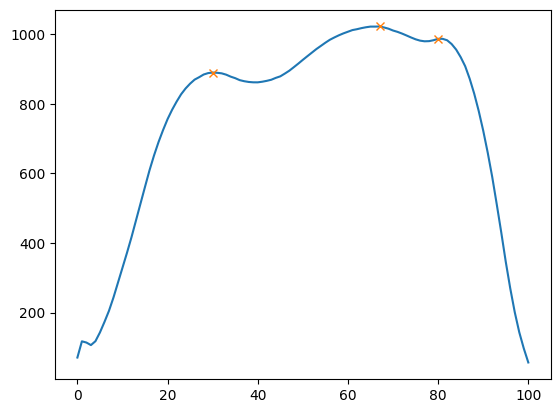

In [178]:
# i=1
# index, _ = find_peaks(loadsol_left_non_exo_25kg_incline_unnormalised.iloc[i,:], height=700)
# plt.plot(loadsol_left_non_exo_25kg_incline_unnormalised.iloc[i,:])
# plt.plot(index, loadsol_left_non_exo_25kg_incline_unnormalised.iloc[i,:][index], "x")
# plt.show()

In [204]:
# Loadsol Left - 25kg
loadsol_left_non_exo_25kg_flat_peak_df = calculate_peaks_in_each_condition(loadsol_left_non_exo_25kg_flat_unnormalised)
loadsol_left_non_exo_25kg_incline_peak_df = calculate_peaks_in_each_condition(loadsol_left_non_exo_25kg_incline_unnormalised)
loadsol_left_non_exo_25kg_decline_peak_df = calculate_peaks_in_each_condition(loadsol_left_non_exo_25kg_decline_unnormalised)

# Loadsol Left - 35kg
loadsol_left_non_exo_35kg_flat_peak_df = calculate_peaks_in_each_condition(loadsol_left_non_exo_35kg_flat_unnormalised)
loadsol_left_non_exo_35kg_incline_peak_df = calculate_peaks_in_each_condition(loadsol_left_non_exo_35kg_incline_unnormalised)
loadsol_left_non_exo_35kg_decline_peak_df = calculate_peaks_in_each_condition(loadsol_left_non_exo_35kg_decline_unnormalised)

# Loadsol Right - 25kg
loadsol_right_non_exo_25kg_flat_peak_df = calculate_peaks_in_each_condition(loadsol_right_non_exo_25kg_flat_unnormalised)
loadsol_right_non_exo_25kg_incline_peak_df = calculate_peaks_in_each_condition(loadsol_right_non_exo_25kg_incline_unnormalised)
loadsol_right_non_exo_25kg_decline_peak_df = calculate_peaks_in_each_condition(loadsol_right_non_exo_25kg_decline_unnormalised)

# Loadsol Right - 35kg
loadsol_right_non_exo_35kg_flat_peak_df = calculate_peaks_in_each_condition(loadsol_right_non_exo_35kg_flat_unnormalised)
loadsol_right_non_exo_35kg_incline_peak_df = calculate_peaks_in_each_condition(loadsol_right_non_exo_35kg_incline_unnormalised)
loadsol_right_non_exo_35kg_decline_peak_df = calculate_peaks_in_each_condition(loadsol_right_non_exo_35kg_decline_unnormalised)

# Bertec Left - 25kg
bertec_left_non_exo_25kg_flat_peak_df = calculate_peaks_in_each_condition(bertec_left_non_exo_25kg_flat_unnormalised)
bertec_left_non_exo_25kg_incline_peak_df = calculate_peaks_in_each_condition(bertec_left_non_exo_25kg_incline_unnormalised)
bertec_left_non_exo_25kg_decline_peak_df = calculate_peaks_in_each_condition(bertec_left_non_exo_25kg_decline_unnormalised)

# Bertec Left - 35kg
bertec_left_non_exo_35kg_flat_peak_df = calculate_peaks_in_each_condition(bertec_left_non_exo_35kg_flat_unnormalised)
bertec_left_non_exo_35kg_incline_peak_df = calculate_peaks_in_each_condition(bertec_left_non_exo_35kg_incline_unnormalised)
bertec_left_non_exo_35kg_decline_peak_df = calculate_peaks_in_each_condition(bertec_left_non_exo_35kg_decline_unnormalised)

# Bertec Right - 25kg
bertec_right_non_exo_25kg_flat_peak_df = calculate_peaks_in_each_condition(bertec_right_non_exo_25kg_flat_unnormalised)
bertec_right_non_exo_25kg_incline_peak_df = calculate_peaks_in_each_condition(bertec_right_non_exo_25kg_incline_unnormalised)
bertec_right_non_exo_25kg_decline_peak_df = calculate_peaks_in_each_condition(bertec_right_non_exo_25kg_decline_unnormalised)

# Bertec Right - 35kg
bertec_right_non_exo_35kg_flat_peak_df = calculate_peaks_in_each_condition(bertec_right_non_exo_35kg_flat_unnormalised)
bertec_right_non_exo_35kg_incline_peak_df = calculate_peaks_in_each_condition(bertec_right_non_exo_35kg_incline_unnormalised)
bertec_right_non_exo_35kg_decline_peak_df = calculate_peaks_in_each_condition(bertec_right_non_exo_35kg_decline_unnormalised)

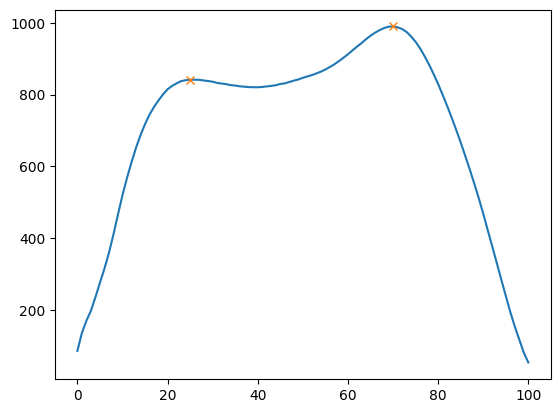

In [353]:
i=0
index, _ = find_peaks(loadsol_left_non_exo_35kg_incline_unnormalised.iloc[i,:], height=700)
plt.plot(loadsol_left_non_exo_35kg_incline_unnormalised.iloc[i,:], label='Bertec')
plt.plot(index, loadsol_left_non_exo_35kg_incline_unnormalised.iloc[i,:][index], "x")
# plt.show()

# index, _ = find_peaks(bertec_left_non_exo_35kg_incline_unnormalised.iloc[i,:], height=700)
# plt.plot(bertec_left_non_exo_35kg_incline_unnormalised.iloc[i,:], label='Loadsol')
# plt.plot(index, bertec_left_non_exo_35kg_incline_unnormalised.iloc[i,:][index], "x")

# plt.legend()
# plt.show()

In [355]:
loadsol_left_non_exo_35kg_incline_unnormalised.iloc[i,:][25]

841.6030392

In [356]:
df = loadsol_left_non_exo_35kg_incline_unnormalised
impact_peaks = []
active_peaks = []
for i in range(0,df.shape[0]):
    index, _ = find_peaks(df.iloc[i,:], height=700)
    impact_peak = df.iloc[i,index[0]]
    active_peak = df.iloc[i,index[-1]]

    impact_peaks.append(impact_peak)
    active_peaks.append(active_peak)

mean_impact = np.mean(impact_peaks)
std_impact = np.std(impact_peaks)

mean_active = np.mean(active_peaks)
std_active = np.std(active_peaks)

print(impact_peaks)
# print(active_peaks)

[841.6030392, 989.2435392000001, 962.7039576, 968.038047, 1025.5177800000001, 936.6293700000001, 1015.8984864000003, 870.5614725]


In [357]:
df = loadsol_left_non_exo_35kg_decline_unnormalised
impact_peaks = []
active_peaks = []
for i in range(0,df.shape[0]):
    index, _ = find_peaks(df.iloc[i,:], height=700)
    impact_peak = df.iloc[i,index[0]]
    active_peak = df.iloc[i,index[-1]]

    impact_peaks.append(impact_peak)
    active_peaks.append(active_peak)

mean_impact = np.mean(impact_peaks)
std_impact = np.std(impact_peaks)

mean_active = np.mean(active_peaks)
std_active = np.std(active_peaks)

print(impact_peaks)
# print(active_peaks)

[1532.4883776000001, 1244.9561004000002, 1566.9752364, 1159.300674, 1293.94881, 1335.2540112000001, 1884.8447424000005, 1488.1058775000001]


In [360]:
df = loadsol_left_non_exo_25kg_flat_unnormalised
impact_peaks = []
active_peaks = []
for i in range(0,df.shape[0]):
    index, _ = find_peaks(df.iloc[i,:], height=700)
    impact_peak = df.iloc[i,index[0]]
    active_peak = df.iloc[i,index[-1]]

    impact_peaks.append(impact_peak)
    active_peaks.append(active_peak)

mean_impact = np.mean(impact_peaks)
std_impact = np.std(impact_peaks)

mean_active = np.mean(active_peaks)
std_active = np.std(active_peaks)

print(impact_peaks)
# print(active_peaks)

[1373.2137080999998, 1036.6376112, 1085.8339764, 1064.9884131000001, 1040.0071500000001, 944.760879, 1246.2278688000004, 1072.3924125]


In [336]:
loadsol_left_non_exo_35kg_flat_peak_df

Mean Impact  Std Impact  Mean Active  Std Active
0  1204.904213  106.486561     1141.389   54.212751

In [337]:
bertec_left_non_exo_35kg_flat_peak_df

Mean Impact  Std Impact  Mean Active  Std Active
0  1233.650325   66.089375  1072.242675   55.231957

In [226]:
def combine_df(df1,df2,df3):
    df = pd.concat([df1, df2, df3])
    df = df.set_index(pd.Index(['Flat', 'Incline', 'Decline']))
    df['Impact'] = df['Mean Impact'].round(1).astype(str) + ' (' + df['Std Impact'].round(1).astype(str) + ')'
    df['Active'] = df['Mean Active'].round(1).astype(str) + ' (' + df['Std Active'].round(1).astype(str) + ')'
    df = pd.DataFrame(df.iloc[:,-2:])
    return df

In [228]:
# Combine into single 

# Loadsol left
loadsol_left_non_exo_25kg_combine = combine_df(loadsol_left_non_exo_25kg_flat_peak_df, loadsol_left_non_exo_25kg_incline_peak_df, loadsol_left_non_exo_25kg_decline_peak_df)
loadsol_left_non_exo_35kg_combine = combine_df(loadsol_left_non_exo_35kg_flat_peak_df, loadsol_left_non_exo_35kg_incline_peak_df, loadsol_left_non_exo_35kg_decline_peak_df)

# Loadsol right
loadsol_right_non_exo_25kg_combine = combine_df(loadsol_right_non_exo_25kg_flat_peak_df, loadsol_right_non_exo_25kg_incline_peak_df, loadsol_right_non_exo_25kg_decline_peak_df)
loadsol_right_non_exo_35kg_combine = combine_df(loadsol_right_non_exo_35kg_flat_peak_df, loadsol_right_non_exo_35kg_incline_peak_df, loadsol_right_non_exo_35kg_decline_peak_df)

# Bertec left
bertec_left_non_exo_25kg_combine = combine_df(bertec_left_non_exo_25kg_flat_peak_df, bertec_left_non_exo_25kg_incline_peak_df, bertec_left_non_exo_25kg_decline_peak_df)
bertec_left_non_exo_35kg_combine = combine_df(bertec_left_non_exo_35kg_flat_peak_df, bertec_left_non_exo_35kg_incline_peak_df, bertec_left_non_exo_35kg_decline_peak_df)

# Bertec right
bertec_right_non_exo_25kg_combine = combine_df(bertec_right_non_exo_25kg_flat_peak_df, bertec_right_non_exo_25kg_incline_peak_df, bertec_right_non_exo_25kg_decline_peak_df)
bertec_right_non_exo_35kg_combine = combine_df(bertec_right_non_exo_35kg_flat_peak_df, bertec_right_non_exo_35kg_incline_peak_df, bertec_right_non_exo_35kg_decline_peak_df)

In [229]:
loadsol_left_non_exo_25kg_combine

Impact         Active
Flat     1108.0 (127.2)  1074.1 (31.5)
Incline    885.5 (39.8)   957.2 (25.7)
Decline  1329.3 (190.5)   888.2 (53.5)

In [237]:
bertec_left_non_exo_25kg_combine

Impact         Active
Flat     1153.8 (74.7)  1022.6 (48.6)
Incline  1068.9 (64.2)   953.0 (52.3)
Decline  1300.1 (86.8)   890.2 (47.6)

In [238]:
loadsol_left_non_exo_35kg_combine

Impact         Active
Flat     1204.9 (106.5)  1141.4 (54.2)
Incline    951.3 (61.5)  1055.2 (44.4)
Decline  1438.2 (216.2)   938.7 (64.4)

In [239]:
bertec_left_non_exo_35kg_combine

Impact         Active
Flat     1233.7 (66.1)  1072.2 (55.2)
Incline  1089.0 (68.3)  1011.9 (57.0)
Decline  1394.4 (82.0)   926.1 (63.1)

In [240]:
loadsol_right_non_exo_25kg_combine

Impact         Active
Flat      1125.1 (82.6)  1050.3 (49.1)
Incline    872.8 (42.3)   952.0 (41.3)
Decline  1366.0 (110.0)   893.0 (39.8)

In [241]:
bertec_right_non_exo_25kg_combine

Impact         Active
Flat     1151.0 (80.7)  1032.7 (50.8)
Incline  1061.4 (65.3)   954.9 (46.0)
Decline  1295.7 (98.5)   879.0 (51.2)

In [242]:
loadsol_right_non_exo_35kg_combine

Impact          Active
Flat      1217.1 (77.5)   1123.6 (56.2)
Incline    950.0 (57.8)   1034.9 (51.6)
Decline  1532.4 (113.3)  1055.6 (162.4)

In [243]:
bertec_right_non_exo_35kg_combine

Impact         Active
Flat      1218.2 (73.4)  1086.6 (67.8)
Incline   1084.0 (83.3)  1020.7 (53.7)
Decline  1406.7 (102.1)   935.9 (80.6)

# 3. SPM Analysis

## Left

### 25kg data

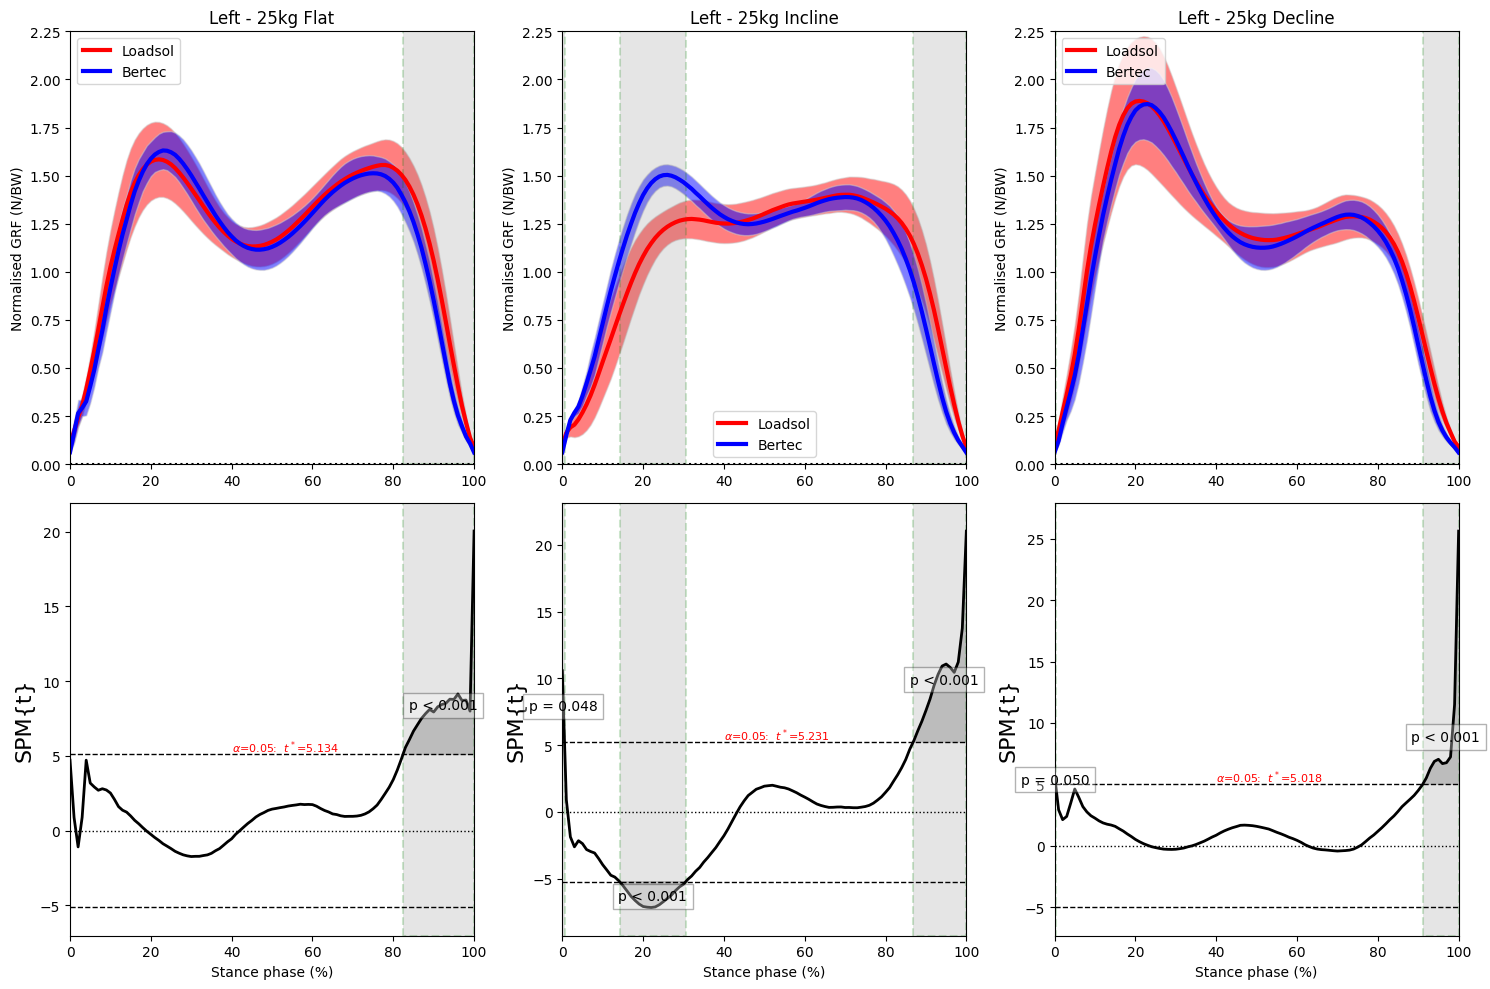

In [363]:
#(1) Perform SPM:
spm1 = spm1d.stats.ttest_paired(loadsol_left_non_exo_25kg_flat.to_numpy(), bertec_left_non_exo_25kg_flat.to_numpy())
spmi1 = spm1.inference(0.05, two_tailed=True, interp=True)

spm2 = spm1d.stats.ttest_paired(loadsol_left_non_exo_25kg_incline.to_numpy(), bertec_left_non_exo_25kg_incline.to_numpy())
spmi2 = spm2.inference(0.05, two_tailed=True, interp=True)

spm3 = spm1d.stats.ttest_paired(loadsol_left_non_exo_25kg_decline.to_numpy(), bertec_left_non_exo_25kg_decline.to_numpy())
spmi3 = spm3.inference(0.05, two_tailed=True, interp=True)
# print(spmi)

#(2) Plot:
# plt.close('all')
left25,AX = plt.subplots(2, 3, figsize=(15, 10) )

### Flat
# plot mean and SD:
ax = AX[0, 0] # First row
ax.set_title('Left - 25kg Flat')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_25kg_flat, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_25kg_flat, linecolor='b', facecolor='b', label='Bertec')
ax.axhline(y=0, color='k', linestyle=':')
ax.axvspan(spmi1.clusters[0].endpoints[0], spmi1.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.axvspan(spmi1.clusters[1].endpoints[0], spmi1.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.axvspan(spmi1.clusters[2].endpoints[0], spmi1.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRF (N/BW)')
ax.set_ylim(0, 2.25)
ax.legend()

# plot SPM results:
ax = AX[1, 0]
plt.sca(ax)
spmi1.plot()
spmi1.plot_threshold_label(fontsize=8)
spmi1.plot_p_values(size=10)
ax.set_xlabel('Stance phase (%)')
ax.axvspan(spmi1.clusters[0].endpoints[0], spmi1.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.axvspan(spmi1.clusters[1].endpoints[0], spmi1.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.axvspan(spmi1.clusters[2].endpoints[0], spmi1.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
plt.tight_layout()

### Incline
# plot mean and SD:
ax = AX[0, 1]
ax.set_title('Left - 25kg Incline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_25kg_incline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_25kg_incline, linecolor='b', facecolor='b', label='Bertec')
ax.axhline(y=0, color='k', linestyle=':')
ax.axvspan(spmi2.clusters[0].endpoints[0], spmi2.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[1].endpoints[0], spmi2.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[2].endpoints[0], spmi2.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRF (N/BW)')
ax.set_ylim(0, 2.25)
ax.legend()

# plot SPM results:
ax = AX[1, 1]
plt.sca(ax)
spmi2.plot()
spmi2.plot_threshold_label(fontsize=8)
spmi2.plot_p_values(size=10)
ax.set_xlabel('Stance phase (%)')
ax.axvspan(spmi2.clusters[0].endpoints[0], spmi2.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[1].endpoints[0], spmi2.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[2].endpoints[0], spmi2.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
plt.tight_layout()
# plt.show()

### Decline
# Plot mean and SD:
ax = AX[0, 2]
ax.set_title('Left - 25kg Decline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_25kg_decline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_25kg_decline, linecolor='b', facecolor='b', label='Bertec')
ax.axhline(y=0, color='k', linestyle=':')
ax.axvspan(spmi3.clusters[0].endpoints[0], spmi3.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[1].endpoints[0], spmi3.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.axvspan(spmi3.clusters[2].endpoints[0], spmi3.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRF (N/BW)')
ax.set_ylim(0, 2.25)
ax.legend()

# plot SPM results:
ax = AX[1, 2]
plt.sca(ax)
spmi3.plot()
spmi3.plot_threshold_label(fontsize=8)
spmi3.plot_p_values(size=10)
ax.set_xlabel('Stance phase (%)')
ax.axvspan(spmi3.clusters[0].endpoints[0], spmi3.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[1].endpoints[0], spmi3.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.axvspan(spmi3.clusters[2].endpoints[0], spmi3.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# plt.text(80,1,'p < 0.001')
plt.tight_layout()
plt.show()

In [61]:
print("Left - 25kg Flat\n")
print(spmi1)

Left - 25kg Flat

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 7)
   SPM.fwhm      :  9.93213
   SPM.resels    :  (1, 10.06833)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  5.13450
   SPM.h0reject  :  True
   SPM.p_set     :  <0.001
   SPM.p_cluster :  (<0.001)





In [62]:
print("Left - 25kg Incline\n")
print(spmi2)

Left - 25kg Incline

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 7)
   SPM.fwhm      :  9.06654
   SPM.resels    :  (1, 11.02957)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  5.23079
   SPM.h0reject  :  True
   SPM.p_set     :  <0.001
   SPM.p_cluster :  (0.048, <0.001, <0.001)





In [63]:
print("Left - 25kg Decline\n")
print(spmi3)

Left - 25kg Decline

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 7)
   SPM.fwhm      :  11.10565
   SPM.resels    :  (1, 9.00443)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  5.01842
   SPM.h0reject  :  True
   SPM.p_set     :  0.001
   SPM.p_cluster :  (0.050, <0.001)





In [64]:
names = ['spmi1', 'spmi2', 'spmi3']
duration = []
pvalues = []
for j in range(0, 3):
    for i in range(len(locals()[names[j]].clusters)):
        duration.append(locals()[names[j]].clusters[i].endpoints)

    for i in range(len(locals()[names[j]].clusters)):
        pvalues.append(locals()[names[j]].clusters[i].P)

# print(pvalues)
print(duration)

[(82.44496836147275, 100.0), (0.0, 0.5527754934599083), (14.187131204665702, 30.5386790384802), (86.8408594516579, 100.0), (0.0, 0.2612969113236556), (91.12271131917028, 100.0)]


In [65]:
keyList = ["name", "p-value", "duration"]
d = {}

for i in keyList:
    d[i] = None

d["name"] = "spmi1"
d["p-value"] = pvalues
d["duration"] = duration
print(d)

{'name': 'spmi1', 'p-value': [4.440892098500626e-16, 0.04806568821831281, 0.0, 7.456701922592401e-12, 0.04972918350681743, 8.857961894181976e-05], 'duration': [(82.44496836147275, 100.0), (0.0, 0.5527754934599083), (14.187131204665702, 30.5386790384802), (86.8408594516579, 100.0), (0.0, 0.2612969113236556), (91.12271131917028, 100.0)]}


### 35kg data

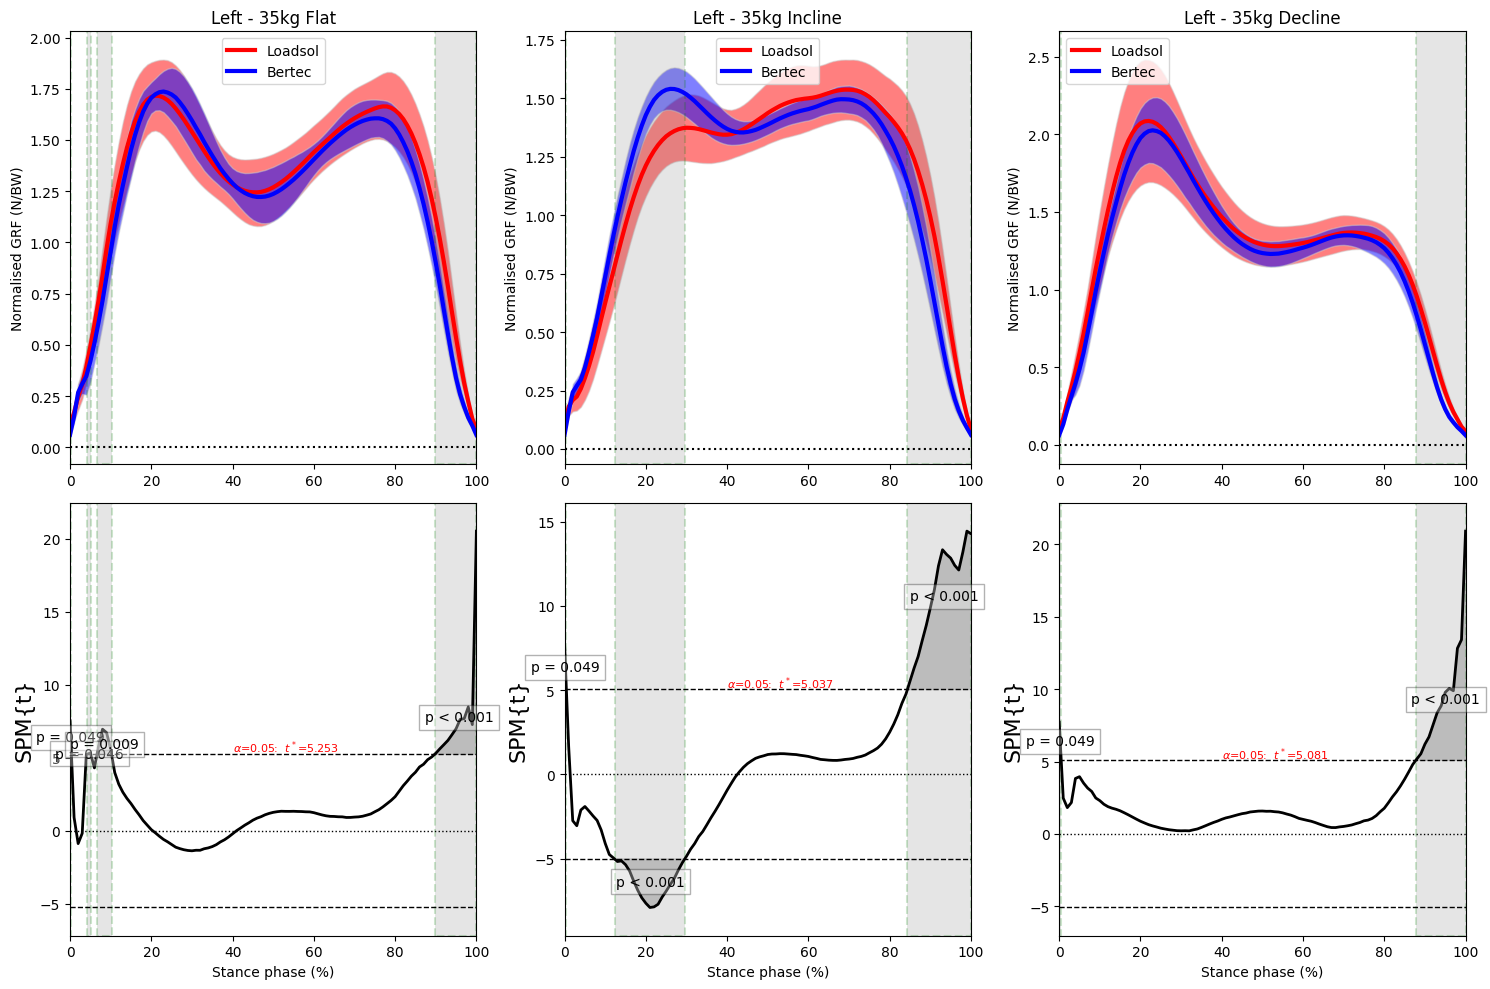

In [365]:
#(1) Perform SPM:
spm1 = spm1d.stats.ttest_paired(loadsol_left_non_exo_35kg_flat.to_numpy(), bertec_left_non_exo_35kg_flat.to_numpy())
spmi1 = spm1.inference(0.05, two_tailed=True, interp=True)

spm2 = spm1d.stats.ttest_paired(loadsol_left_non_exo_35kg_incline.to_numpy(), bertec_left_non_exo_35kg_incline.to_numpy())
spmi2 = spm2.inference(0.05, two_tailed=True, interp=True)

spm3 = spm1d.stats.ttest_paired(loadsol_left_non_exo_35kg_decline.to_numpy(), bertec_left_non_exo_35kg_decline.to_numpy())
spmi3 = spm3.inference(0.05, two_tailed=True, interp=True)
# print(spmi)

#(2) Plot:
# plt.close('all')
left35,AX = plt.subplots(2, 3, figsize=(15, 10) )

### Flat
# plot mean and SD:
ax = AX[0, 0] # First row
ax.set_title('Left - 35kg Flat')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_35kg_flat, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_35kg_flat, linecolor='b', facecolor='b', label='Bertec')
ax.axhline(y=0, color='k', linestyle=':')
ax.axvspan(spmi1.clusters[0].endpoints[0], spmi1.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi1.clusters[1].endpoints[0], spmi1.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi1.clusters[2].endpoints[0], spmi1.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi1.clusters[3].endpoints[0], spmi1.clusters[3].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRF (N/BW)')
ax.legend()

# plot SPM results:
ax = AX[1, 0]
plt.sca(ax)
spmi1.plot()
spmi1.plot_threshold_label(fontsize=8)
spmi1.plot_p_values(size=10)
ax.set_xlabel('Stance phase (%)')
ax.axvspan(spmi1.clusters[0].endpoints[0], spmi1.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi1.clusters[1].endpoints[0], spmi1.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi1.clusters[2].endpoints[0], spmi1.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi1.clusters[3].endpoints[0], spmi1.clusters[3].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
plt.tight_layout()

### Incline
# plot mean and SD:
ax = AX[0, 1]
ax.set_title('Left - 35kg Incline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_35kg_incline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_35kg_incline, linecolor='b', facecolor='b', label='Bertec')
ax.axhline(y=0, color='k', linestyle=':')
ax.axvspan(spmi2.clusters[0].endpoints[0], spmi2.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[1].endpoints[0], spmi2.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[2].endpoints[0], spmi2.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRF (N/BW)')
ax.legend()

# plot SPM results:
ax = AX[1, 1]
plt.sca(ax)
spmi2.plot()
spmi2.plot_threshold_label(fontsize=8)
spmi2.plot_p_values(size=10)
ax.set_xlabel('Stance phase (%)')
ax.axvspan(spmi2.clusters[0].endpoints[0], spmi2.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[1].endpoints[0], spmi2.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[2].endpoints[0], spmi2.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
plt.tight_layout()
# plt.show()

### Decline
# Plot mean and SD:
ax = AX[0, 2]
ax.set_title('Left - 35kg Decline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_35kg_decline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_35kg_decline, linecolor='b', facecolor='b', label='Bertec')
ax.axhline(y=0, color='k', linestyle=':')
ax.axvspan(spmi3.clusters[0].endpoints[0], spmi3.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[1].endpoints[0], spmi3.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRF (N/BW)')
ax.legend()

# plot SPM results:
ax = AX[1, 2]
plt.sca(ax)
spmi3.plot()
spmi3.plot_threshold_label(fontsize=8)
spmi3.plot_p_values(size=10)
ax.set_xlabel('Stance phase (%)')
ax.axvspan(spmi3.clusters[0].endpoints[0], spmi3.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[1].endpoints[0], spmi3.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
plt.tight_layout()
plt.show()

In [70]:
print("Left - 35kg Flat\n")
print(spmi1)

Left - 35kg Flat

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 7)
   SPM.fwhm      :  8.88276
   SPM.resels    :  (1, 11.25777)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  5.25261
   SPM.h0reject  :  True
   SPM.p_set     :  <0.001
   SPM.p_cluster :  (0.049, 0.046, 0.009, <0.001)





In [71]:
print("Left - 35kg Incline\n")
print(spmi2)

Left - 35kg Incline

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 7)
   SPM.fwhm      :  10.90817
   SPM.resels    :  (1, 9.16744)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  5.03693
   SPM.h0reject  :  True
   SPM.p_set     :  <0.001
   SPM.p_cluster :  (0.049, <0.001, <0.001)





In [72]:
print("Left - 35kg Decline\n")
print(spmi3)

Left - 35kg Decline

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 7)
   SPM.fwhm      :  10.45647
   SPM.resels    :  (1, 9.56345)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  5.08077
   SPM.h0reject  :  True
   SPM.p_set     :  0.001
   SPM.p_cluster :  (0.049, <0.001)





## Right

### 25kg data

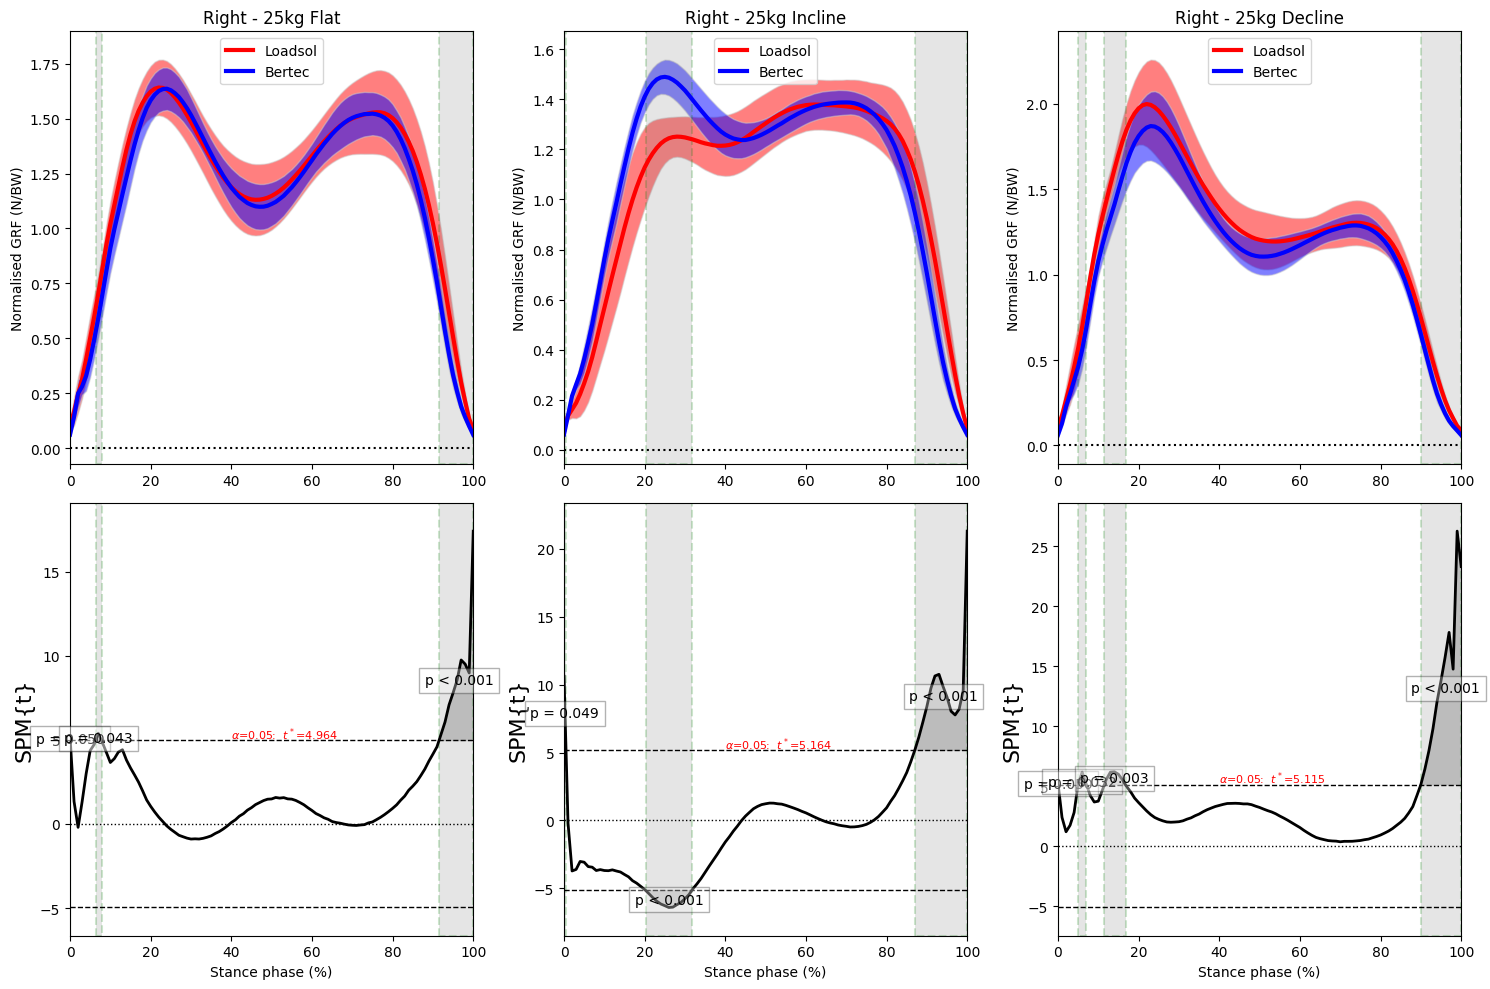

In [366]:
#(1) Perform SPM:
spm1 = spm1d.stats.ttest_paired(loadsol_right_non_exo_25kg_flat.to_numpy(), bertec_right_non_exo_25kg_flat.to_numpy())
spmi1 = spm1.inference(0.05, two_tailed=True, interp=True)

spm2 = spm1d.stats.ttest_paired(loadsol_right_non_exo_25kg_incline.to_numpy(), bertec_right_non_exo_25kg_incline.to_numpy())
spmi2 = spm2.inference(0.05, two_tailed=True, interp=True)

spm3 = spm1d.stats.ttest_paired(loadsol_right_non_exo_25kg_decline.to_numpy(), bertec_right_non_exo_25kg_decline.to_numpy())
spmi3 = spm3.inference(0.05, two_tailed=True, interp=True)
# print(spmi)

#(2) Plot:
# plt.close('all')
right25,AX = plt.subplots(2, 3, figsize=(15, 10) )

### Flat
# plot mean and SD:
ax = AX[0, 0] # First row
ax.set_title('Right - 25kg Flat')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_25kg_flat, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_25kg_flat, linecolor='b', facecolor='b', label='Bertec')
ax.axhline(y=0, color='k', linestyle=':')
ax.axvspan(spmi1.clusters[0].endpoints[0], spmi1.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi1.clusters[1].endpoints[0], spmi1.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi1.clusters[2].endpoints[0], spmi1.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRF (N/BW)')
ax.legend()

# plot SPM results:
ax = AX[1, 0]
plt.sca(ax)
spmi1.plot()
spmi1.plot_threshold_label(fontsize=8)
spmi1.plot_p_values(size=10)
ax.set_xlabel('Stance phase (%)')
ax.axvspan(spmi1.clusters[0].endpoints[0], spmi1.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi1.clusters[1].endpoints[0], spmi1.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi1.clusters[2].endpoints[0], spmi1.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
plt.tight_layout()

### Incline
# plot mean and SD:
ax = AX[0, 1]
ax.set_title('Right - 25kg Incline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_25kg_incline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_25kg_incline, linecolor='b', facecolor='b', label='Bertec')
ax.axhline(y=0, color='k', linestyle=':')
ax.axvspan(spmi2.clusters[0].endpoints[0], spmi2.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[1].endpoints[0], spmi2.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[2].endpoints[0], spmi2.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRF (N/BW)')
ax.legend()

# plot SPM results:
ax = AX[1, 1]
plt.sca(ax)
spmi2.plot()
spmi2.plot_threshold_label(fontsize=8)
spmi2.plot_p_values(size=10)
ax.set_xlabel('Stance phase (%)')
ax.axvspan(spmi2.clusters[0].endpoints[0], spmi2.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[1].endpoints[0], spmi2.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[2].endpoints[0], spmi2.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
plt.tight_layout()
# plt.show()

### Decline
# Plot mean and SD:
ax = AX[0, 2]
ax.set_title('Right - 25kg Decline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_25kg_decline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_25kg_decline, linecolor='b', facecolor='b', label='Bertec')
ax.axhline(y=0, color='k', linestyle=':')
ax.axvspan(spmi3.clusters[0].endpoints[0], spmi3.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[1].endpoints[0], spmi3.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[2].endpoints[0], spmi3.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[3].endpoints[0], spmi3.clusters[3].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRF (N/BW)')
ax.legend()

# plot SPM results:
ax = AX[1, 2]
plt.sca(ax)
spmi3.plot()
spmi3.plot_threshold_label(fontsize=8)
spmi3.plot_p_values(size=10)
ax.set_xlabel('Stance phase (%)')
ax.axvspan(spmi3.clusters[0].endpoints[0], spmi3.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[1].endpoints[0], spmi3.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[2].endpoints[0], spmi3.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[3].endpoints[0], spmi3.clusters[3].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
plt.tight_layout()
plt.show()

In [29]:
print("Right - 25kg Flat\n")
print(spmi1)

print("Right - 25kg Incline\n")
print(spmi2)

print("Right - 25kg Decline\n")
print(spmi3)

Right - 25kg Flat

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 7)
   SPM.fwhm      :  11.71361
   SPM.resels    :  (1, 8.53708)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  4.96374
   SPM.h0reject  :  True
   SPM.p_set     :  <0.001
   SPM.p_cluster :  (0.050, 0.043, <0.001)



Right - 25kg Incline

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 7)
   SPM.fwhm      :  9.66114
   SPM.resels    :  (1, 10.35074)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  5.16357
   SPM.h0reject  :  True
   SPM.p_set     :  <0.001
   SPM.p_cluster :  (0.049, <0.001, <0.001)



Right - 25kg Decline

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 7)
   SPM.fwhm      :  10.11909
   SPM.resels    :  (1, 9.88231)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  5.11497
   SPM.h0reject  :  True
   SPM.p_set     :  <0.001
   SPM.p_clus

### 35kg data

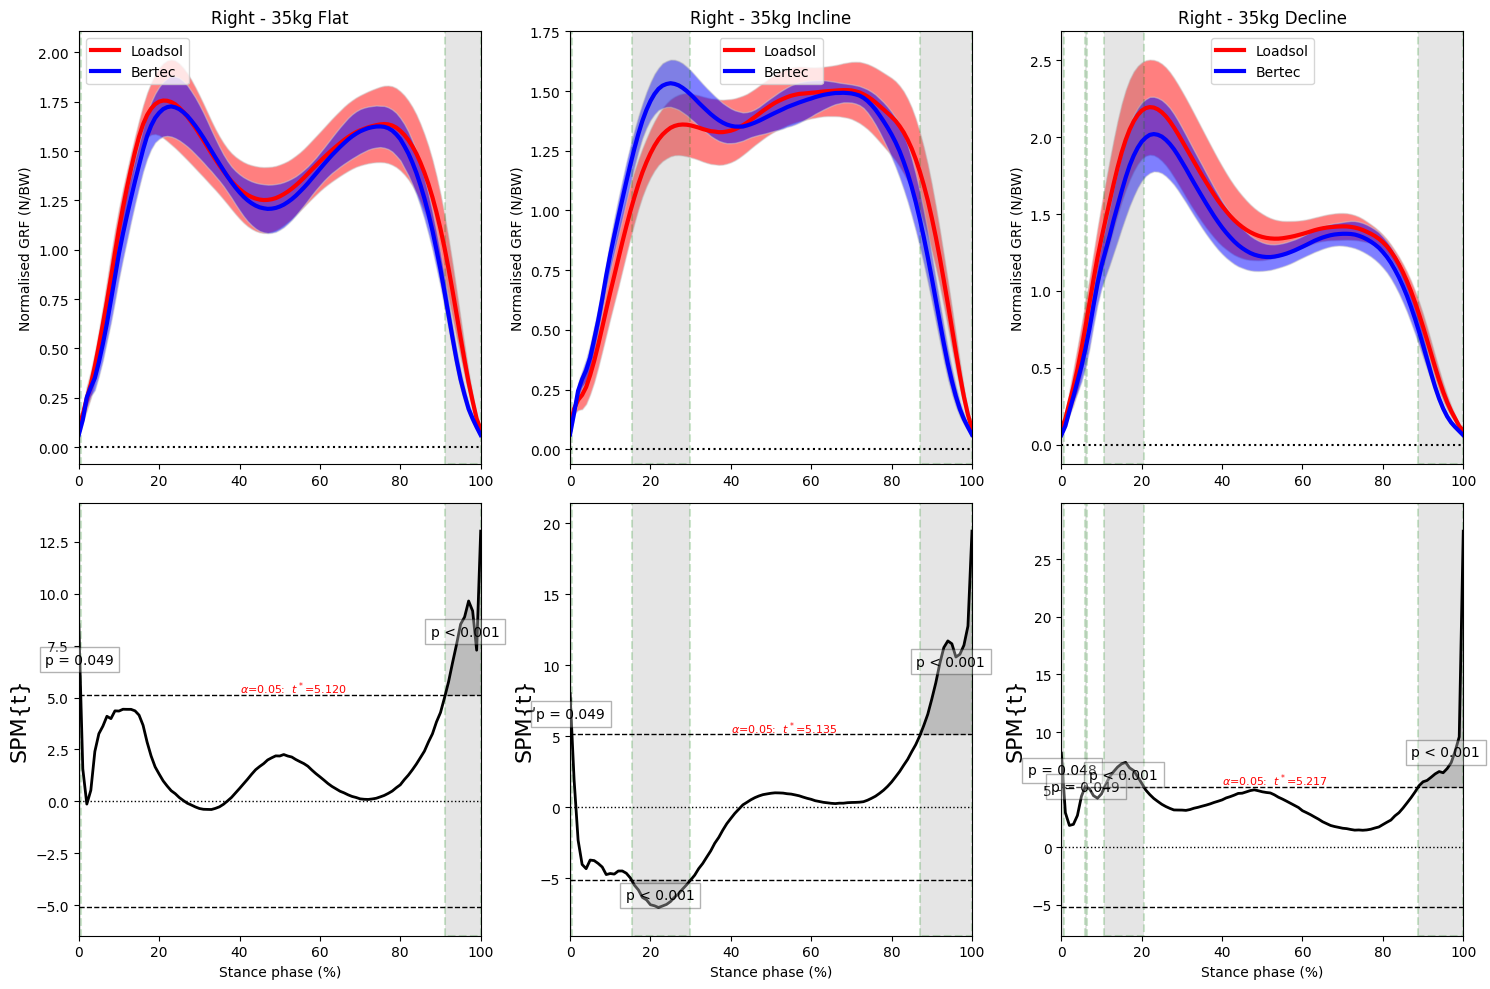

In [367]:
#(1) Perform SPM:
spm1 = spm1d.stats.ttest_paired(loadsol_right_non_exo_35kg_flat.to_numpy(), bertec_right_non_exo_35kg_flat.to_numpy())
spmi1 = spm1.inference(0.05, two_tailed=True, interp=True)

spm2 = spm1d.stats.ttest_paired(loadsol_right_non_exo_35kg_incline.to_numpy(), bertec_right_non_exo_35kg_incline.to_numpy())
spmi2 = spm2.inference(0.05, two_tailed=True, interp=True)

spm3 = spm1d.stats.ttest_paired(loadsol_right_non_exo_35kg_decline.to_numpy(), bertec_right_non_exo_35kg_decline.to_numpy())
spmi3 = spm3.inference(0.05, two_tailed=True, interp=True)
# print(spmi)

#(2) Plot:
# plt.close('all')
right35,AX = plt.subplots(2, 3, figsize=(15, 10) )

### Flat
# plot mean and SD:
ax = AX[0, 0] # First row
ax.set_title('Right - 35kg Flat')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_35kg_flat, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_35kg_flat, linecolor='b', facecolor='b', label='Bertec')
ax.axhline(y=0, color='k', linestyle=':')
ax.axvspan(spmi1.clusters[0].endpoints[0], spmi1.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi1.clusters[1].endpoints[0], spmi1.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.axvspan(spmi1.clusters[2].endpoints[0], spmi1.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRF (N/BW)')
ax.legend()

# plot SPM results:
ax = AX[1, 0]
plt.sca(ax)
spmi1.plot()
spmi1.plot_threshold_label(fontsize=8)
spmi1.plot_p_values(size=10)
ax.set_xlabel('Stance phase (%)')
ax.axvspan(spmi1.clusters[0].endpoints[0], spmi1.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi1.clusters[1].endpoints[0], spmi1.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.axvspan(spmi1.clusters[2].endpoints[0], spmi1.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
plt.tight_layout()

### Incline
# plot mean and SD:
ax = AX[0, 1]
ax.set_title('Right - 35kg Incline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_35kg_incline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_35kg_incline, linecolor='b', facecolor='b', label='Bertec')
ax.axhline(y=0, color='k', linestyle=':')
ax.axvspan(spmi2.clusters[0].endpoints[0], spmi2.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[1].endpoints[0], spmi2.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[2].endpoints[0], spmi2.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.axvspan(spmi2.clusters[3].endpoints[0], spmi2.clusters[3].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRF (N/BW)')
ax.legend()

# plot SPM results:
ax = AX[1, 1]
plt.sca(ax)
spmi2.plot()
spmi2.plot_threshold_label(fontsize=8)
spmi2.plot_p_values(size=10)
ax.set_xlabel('Stance phase (%)')
ax.axvspan(spmi2.clusters[0].endpoints[0], spmi2.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[1].endpoints[0], spmi2.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi2.clusters[2].endpoints[0], spmi2.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.axvspan(spmi2.clusters[3].endpoints[0], spmi2.clusters[3].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
plt.tight_layout()
# plt.show()

### Decline
# Plot mean and SD:
ax = AX[0, 2]
ax.set_title('Right - 35kg Decline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_35kg_decline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_35kg_decline, linecolor='b', facecolor='b', label='Bertec')
ax.axhline(y=0, color='k', linestyle=':')
ax.axvspan(spmi3.clusters[0].endpoints[0], spmi3.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[1].endpoints[0], spmi3.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[2].endpoints[0], spmi3.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[3].endpoints[0], spmi3.clusters[3].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRF (N/BW)')
ax.legend()

# plot SPM results:
ax = AX[1, 2]
plt.sca(ax)
spmi3.plot()
spmi3.plot_threshold_label(fontsize=8)
spmi3.plot_p_values(size=10)
ax.set_xlabel('Stance phase (%)')
ax.axvspan(spmi3.clusters[0].endpoints[0], spmi3.clusters[0].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[1].endpoints[0], spmi3.clusters[1].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[2].endpoints[0], spmi3.clusters[2].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
ax.axvspan(spmi3.clusters[3].endpoints[0], spmi3.clusters[3].endpoints[1], facecolor='gray', alpha=0.2, linestyle='dashed', edgecolor='g', linewidth=1.5)
plt.tight_layout()
plt.show()

In [31]:
print("Right - 25kg Flat\n")
print(spmi1)

print("Right - 25kg Incline\n")
print(spmi2)

print("Right - 25kg Decline\n")
print(spmi3)

Right - 25kg Flat

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 7)
   SPM.fwhm      :  10.06966
   SPM.resels    :  (1, 9.93082)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  5.12009
   SPM.h0reject  :  True
   SPM.p_set     :  0.001
   SPM.p_cluster :  (0.049, <0.001)



Right - 25kg Incline

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 7)
   SPM.fwhm      :  9.92603
   SPM.resels    :  (1, 10.07452)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  5.13514
   SPM.h0reject  :  True
   SPM.p_set     :  <0.001
   SPM.p_cluster :  (0.049, <0.001, <0.001)



Right - 25kg Decline

SPM{t} inference field
   SPM.z         :  (1x101) raw test stat field
   SPM.df        :  (1, 7)
   SPM.fwhm      :  9.18091
   SPM.resels    :  (1, 10.89217)
Inference:
   SPM.alpha     :  0.050
   SPM.zstar     :  5.21747
   SPM.h0reject  :  True
   SPM.p_set     :  <0.001
   SPM.p_cluster :  (

# 4. All figures

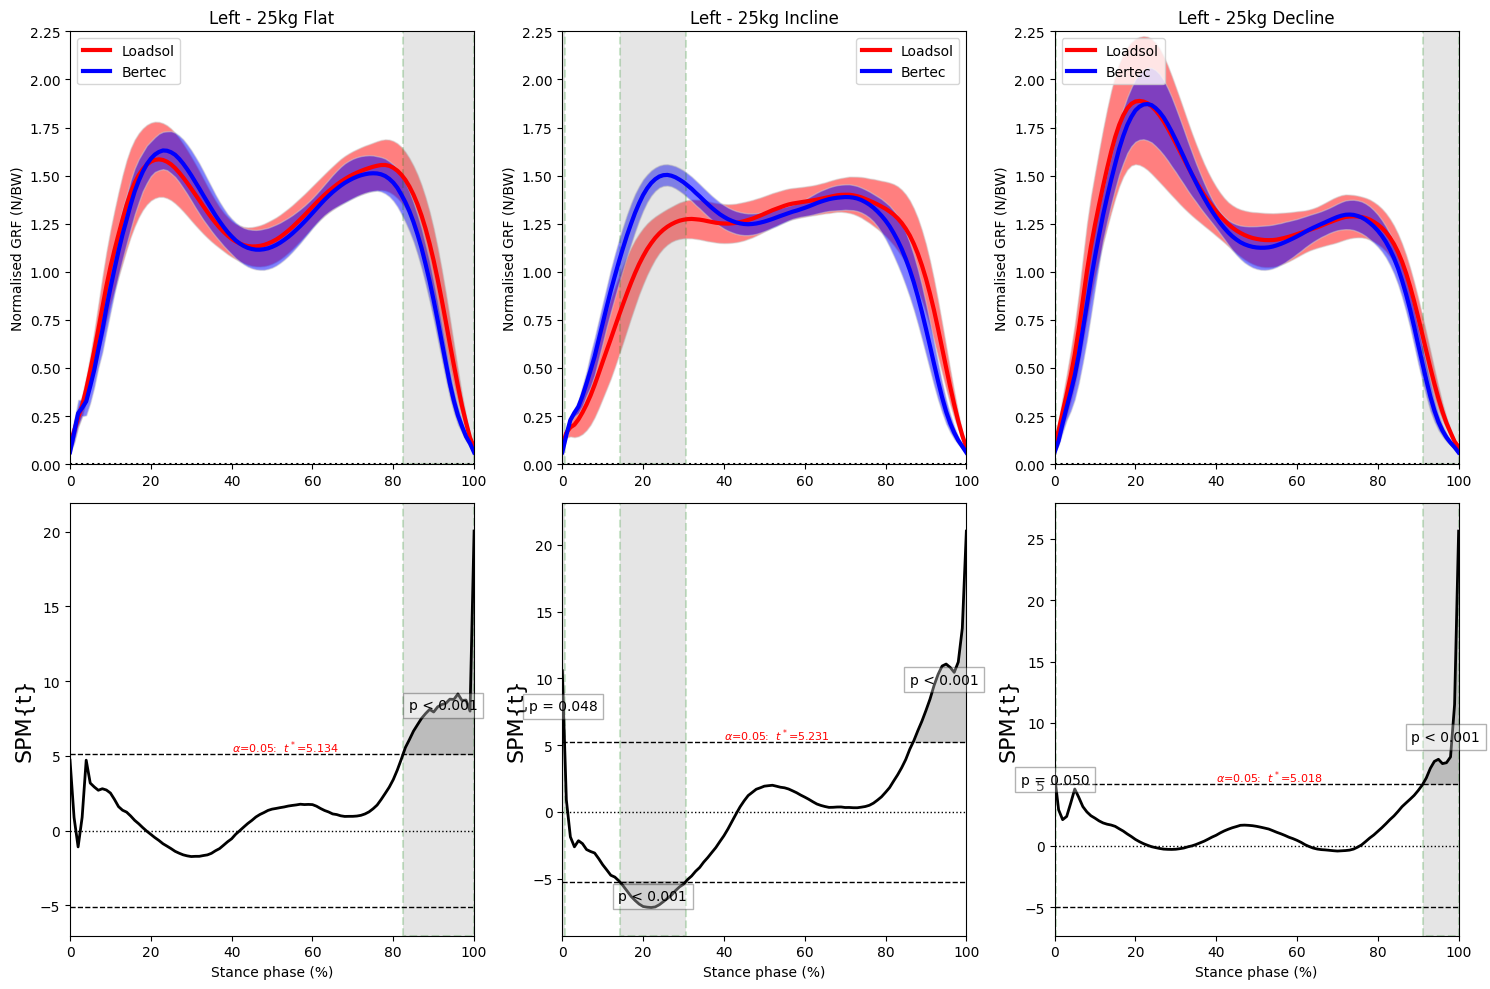

In [32]:
left25

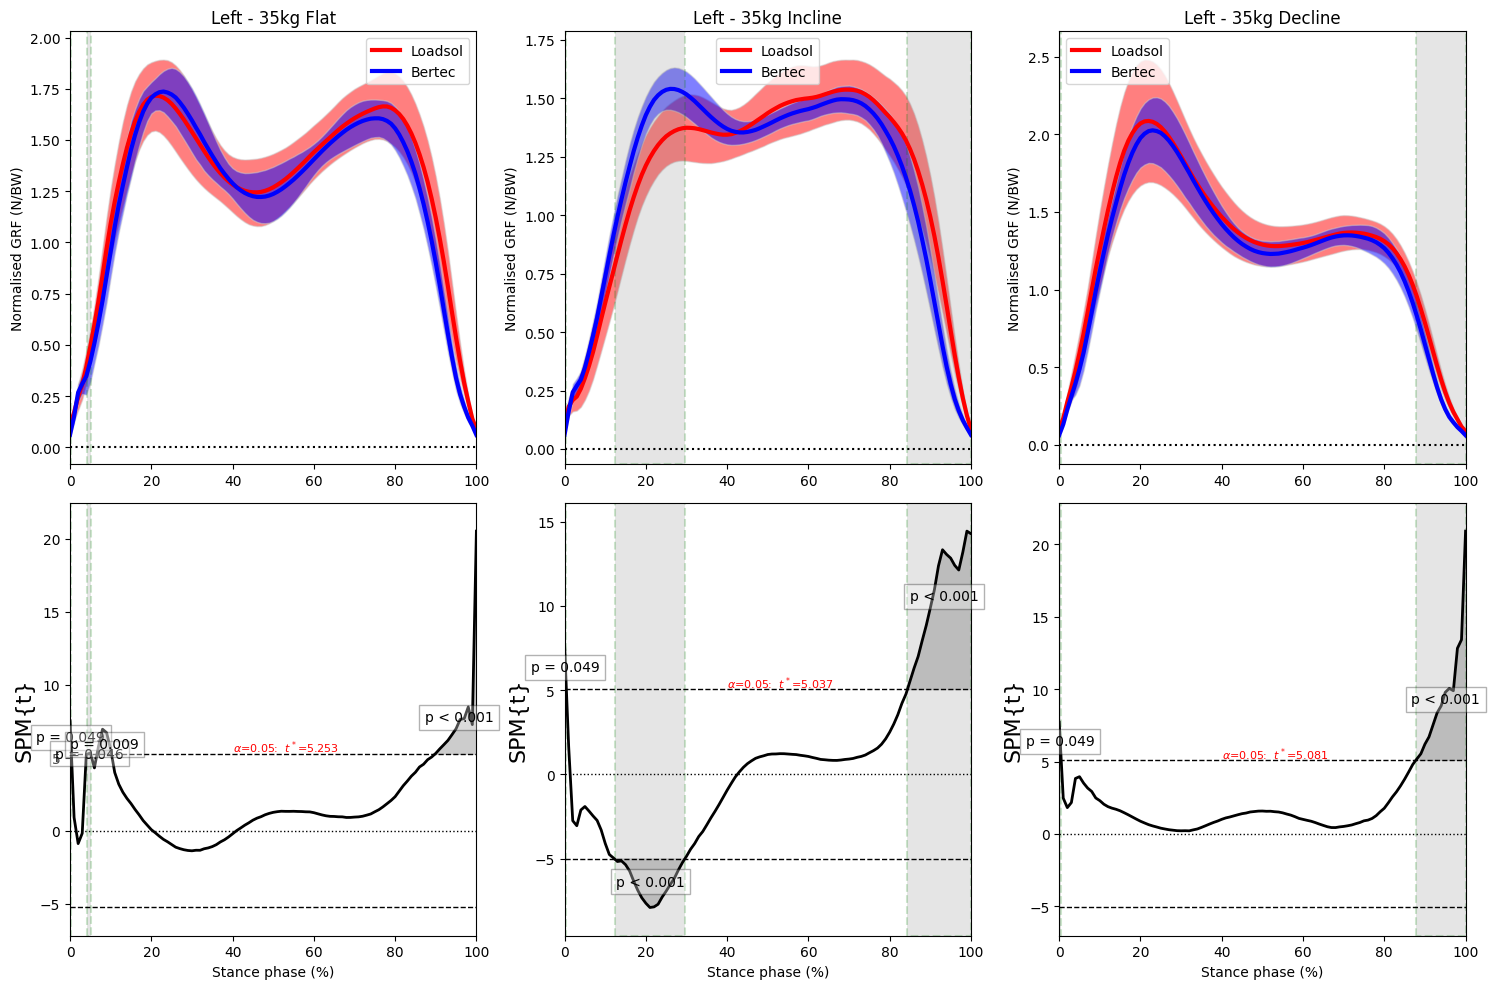

In [33]:
left35

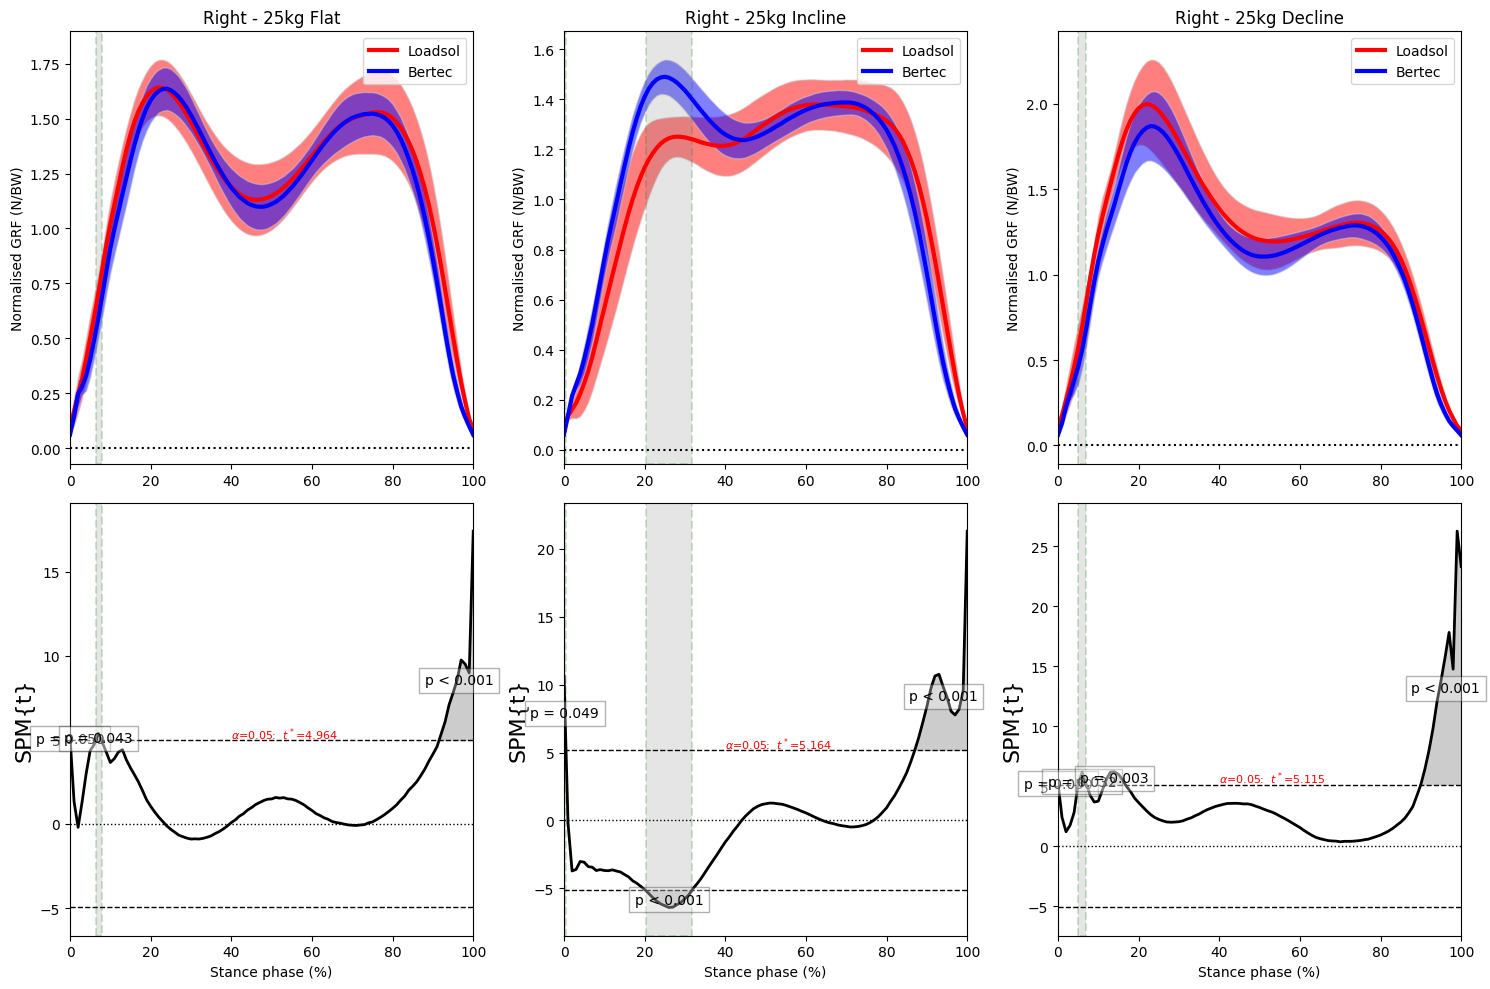

In [34]:
right25

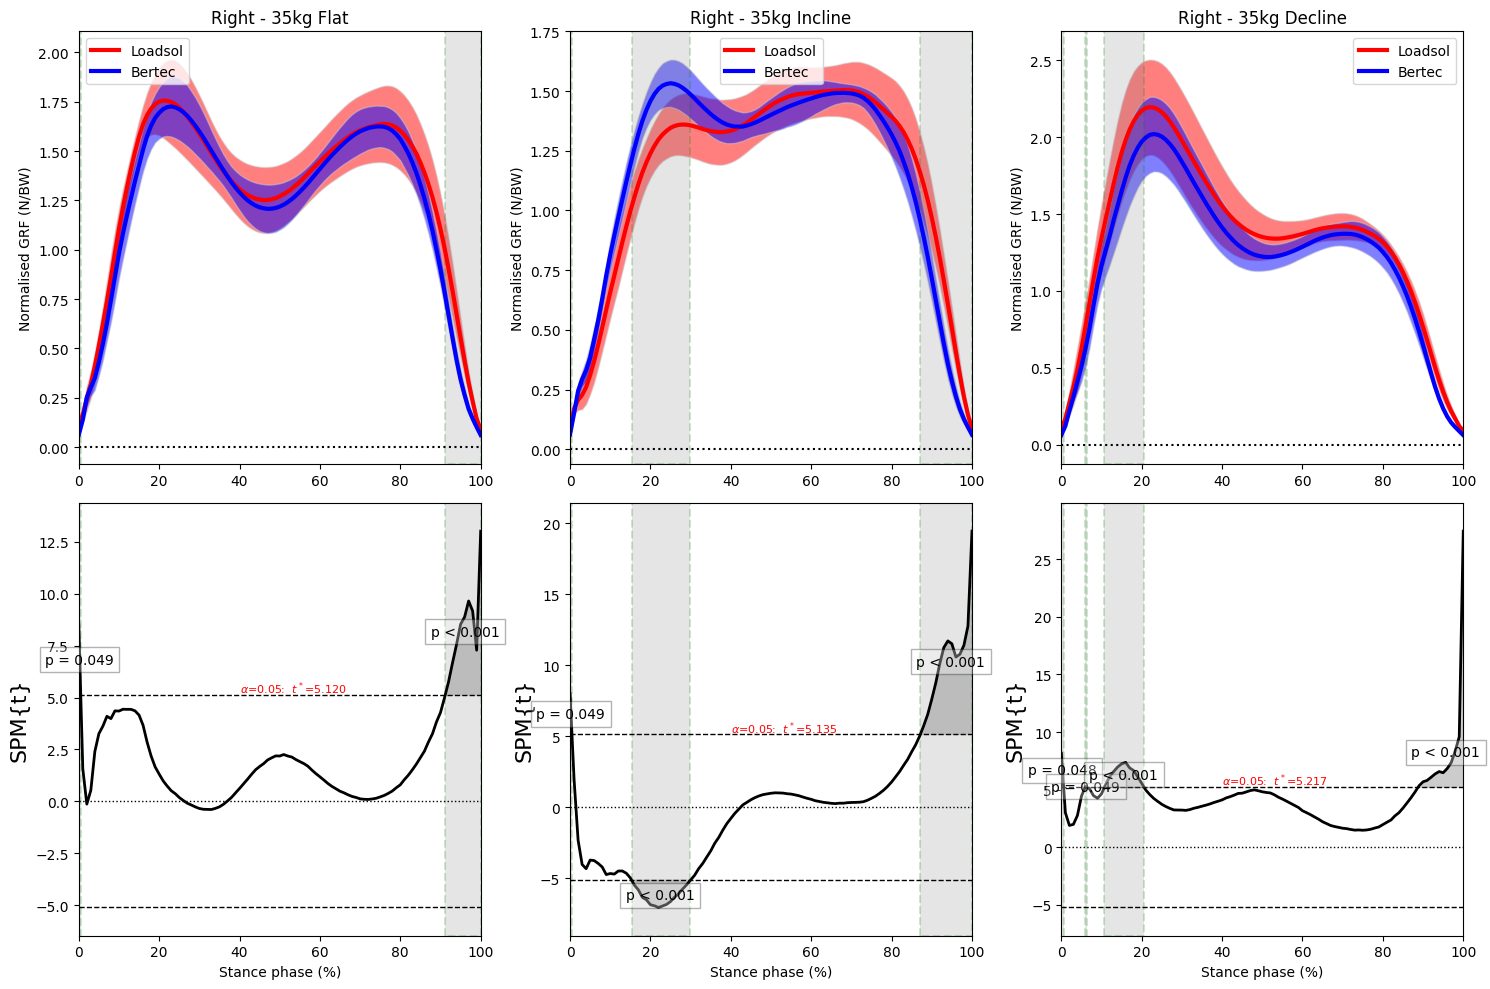

In [35]:
right35

# GRF without SPM

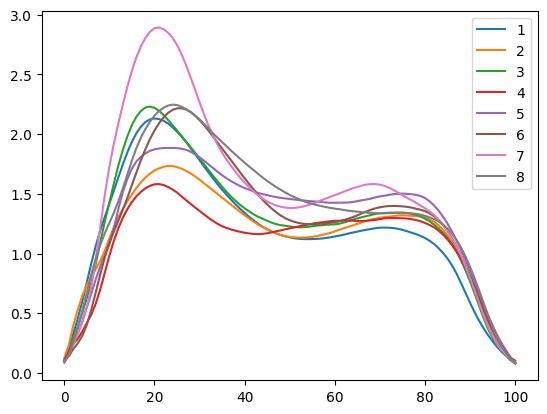

In [36]:
for i in range(0, len(loadsol_left_non_exo_35kg_decline)):
    plt.plot(loadsol_left_non_exo_35kg_decline.iloc[i,:], label=i+1)
    plt.legend()

### Left

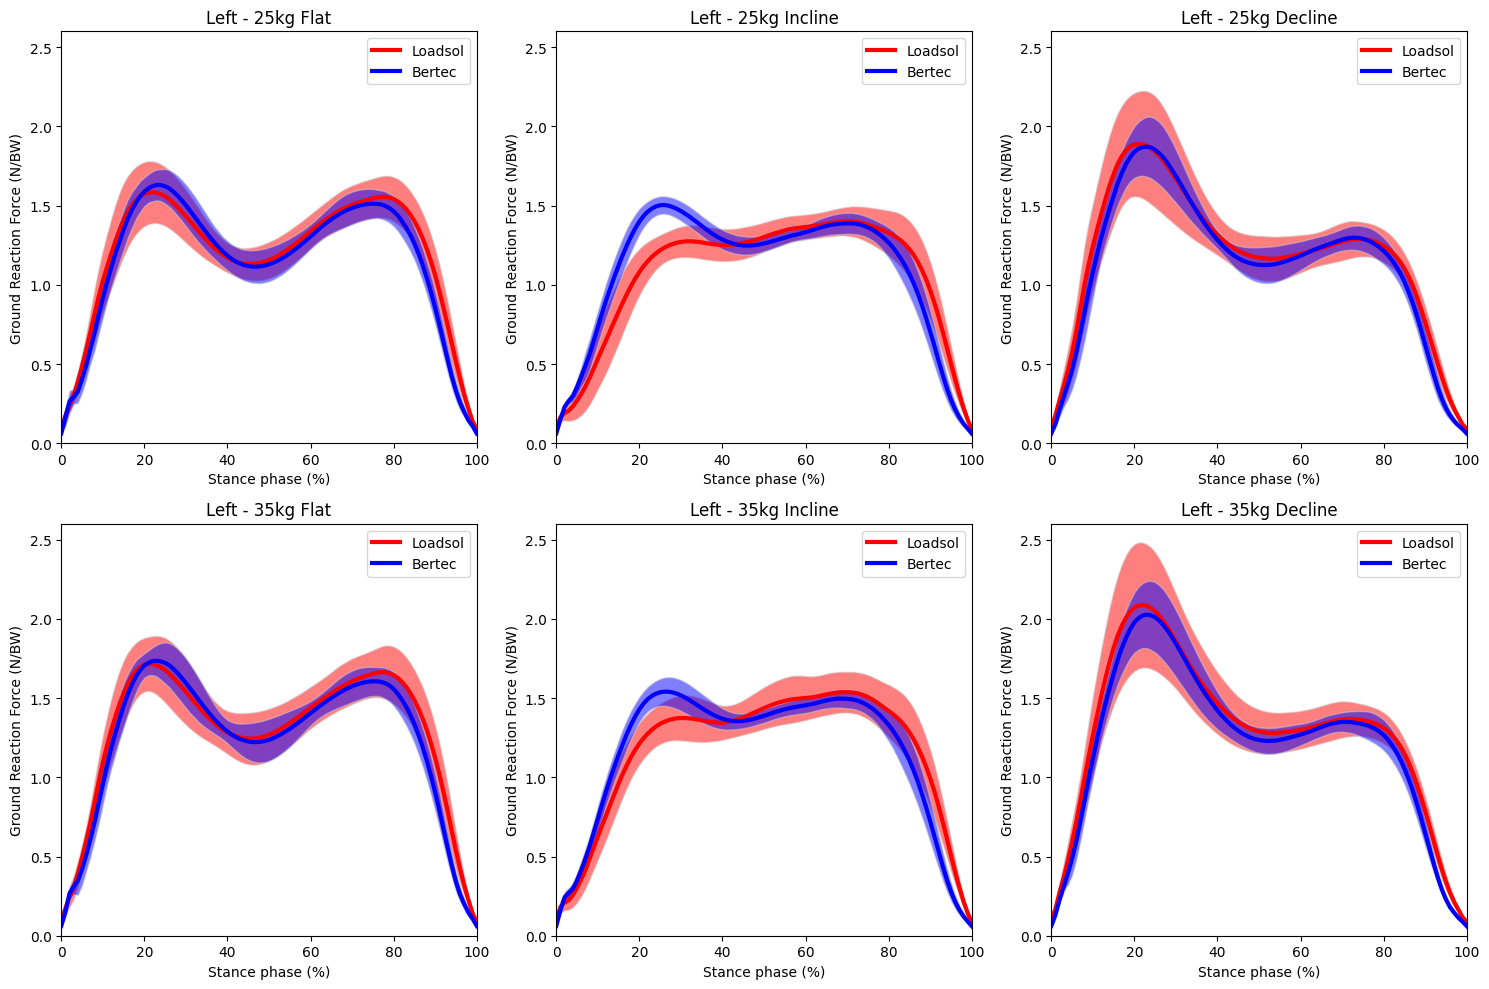

In [361]:
#(1) Perform SPM:
spm1 = spm1d.stats.ttest_paired(loadsol_left_non_exo_25kg_flat.to_numpy(), bertec_left_non_exo_25kg_flat.to_numpy())
spmi1 = spm1.inference(0.05, two_tailed=True, interp=True)

spm2 = spm1d.stats.ttest_paired(loadsol_left_non_exo_25kg_incline.to_numpy(), bertec_left_non_exo_25kg_incline.to_numpy())
spmi2 = spm2.inference(0.05, two_tailed=True, interp=True)

spm3 = spm1d.stats.ttest_paired(loadsol_left_non_exo_25kg_decline.to_numpy(), bertec_left_non_exo_25kg_decline.to_numpy())
spmi3 = spm3.inference(0.05, two_tailed=True, interp=True)

spm4 = spm1d.stats.ttest_paired(loadsol_left_non_exo_35kg_flat.to_numpy(), bertec_left_non_exo_35kg_flat.to_numpy())
spmi4 = spm4.inference(0.05, two_tailed=True, interp=True)

spm5 = spm1d.stats.ttest_paired(loadsol_left_non_exo_35kg_incline.to_numpy(), bertec_left_non_exo_35kg_incline.to_numpy())
spmi5 = spm5.inference(0.05, two_tailed=True, interp=True)

spm6 = spm1d.stats.ttest_paired(loadsol_left_non_exo_35kg_decline.to_numpy(), bertec_left_non_exo_35kg_decline.to_numpy())
spmi6 = spm6.inference(0.05, two_tailed=True, interp=True)
# print(spmi)

#(2) Plot:
# plt.close('all')
left25,AX = plt.subplots(2, 3, figsize=(15, 10) )

### Flat
# Left 25kg
ax = AX[0, 0] # First row
ax.set_title('Left - 25kg Flat')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_25kg_flat, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_25kg_flat, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()

# Left 35kg
ax = AX[1, 0]
ax.set_title('Left - 35kg Flat')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_35kg_flat, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_35kg_flat, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()
plt.tight_layout()


### Incline
# Left 25kg
ax = AX[0, 1]
ax.set_title('Left - 25kg Incline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_25kg_incline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_25kg_incline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()

# Left 35kg
ax = AX[1, 1]
ax.set_title('Left - 35kg Incline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_35kg_incline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_35kg_incline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()
plt.tight_layout()

### Decline
# Left 25kg
ax = AX[0, 2]
ax.set_title('Left - 25kg Decline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_25kg_decline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_25kg_decline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()

# Left 35kg
ax = AX[1, 2]
ax.set_title('Left - 35kg Decline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_left_non_exo_35kg_decline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_left_non_exo_35kg_decline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()
plt.tight_layout()

### Right

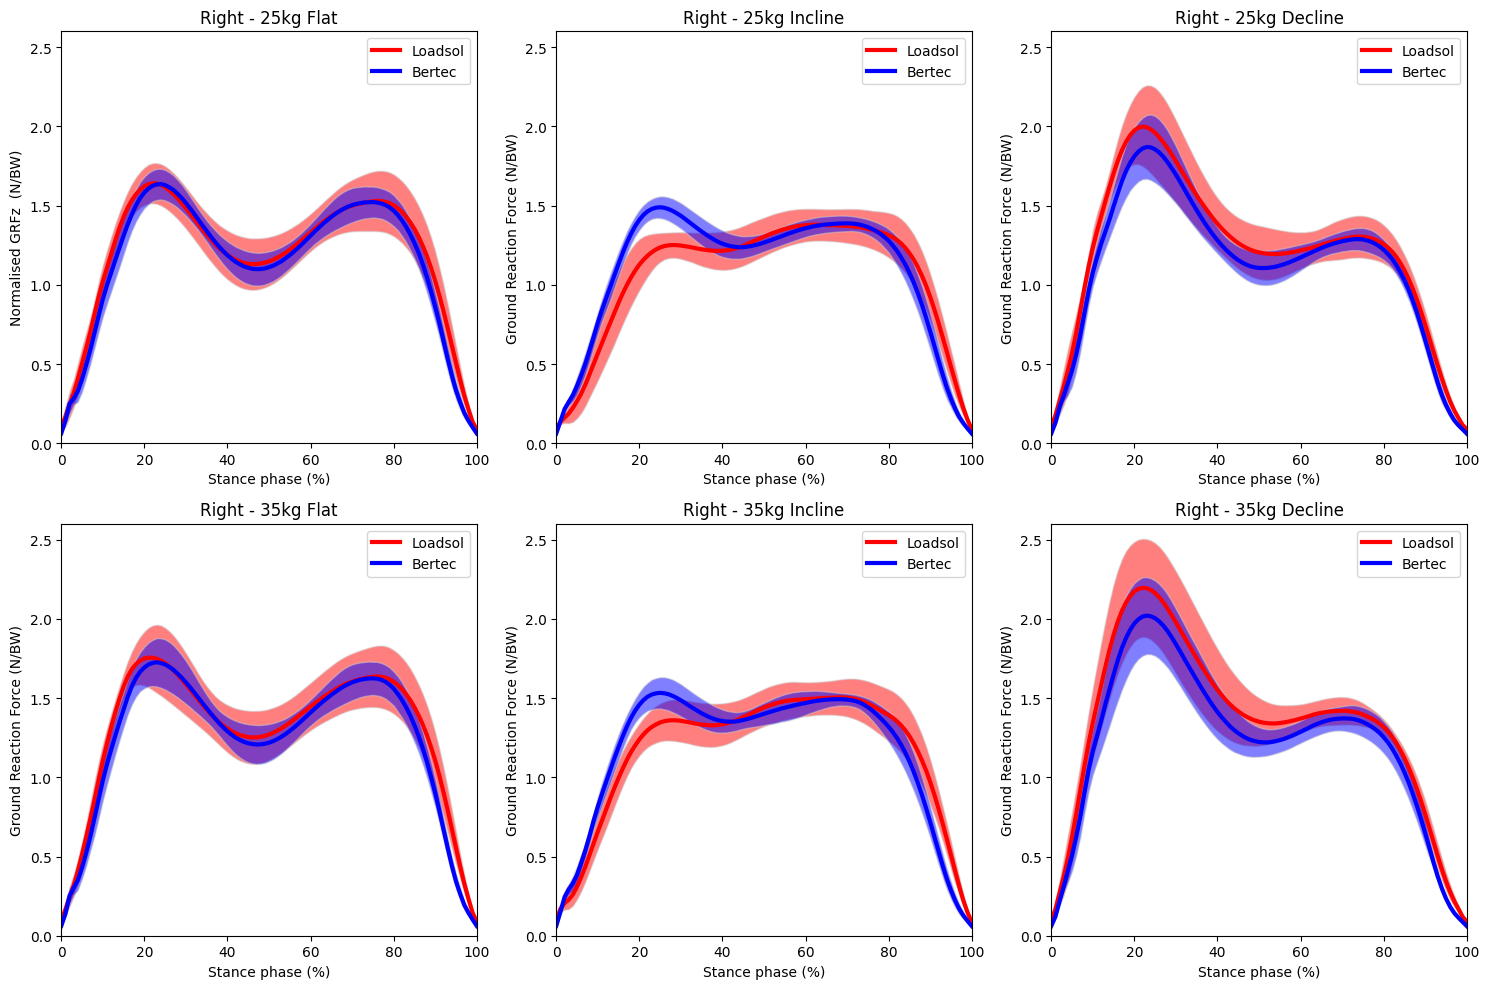

In [362]:
#(1) Perform SPM:
spm1 = spm1d.stats.ttest_paired(loadsol_right_non_exo_25kg_flat.to_numpy(), bertec_right_non_exo_25kg_flat.to_numpy())
spmi1 = spm1.inference(0.05, two_tailed=True, interp=True)

spm2 = spm1d.stats.ttest_paired(loadsol_right_non_exo_25kg_incline.to_numpy(), bertec_right_non_exo_25kg_incline.to_numpy())
spmi2 = spm2.inference(0.05, two_tailed=True, interp=True)

spm3 = spm1d.stats.ttest_paired(loadsol_right_non_exo_25kg_decline.to_numpy(), bertec_right_non_exo_25kg_decline.to_numpy())
spmi3 = spm3.inference(0.05, two_tailed=True, interp=True)

spm4 = spm1d.stats.ttest_paired(loadsol_right_non_exo_35kg_flat.to_numpy(), bertec_right_non_exo_35kg_flat.to_numpy())
spmi4 = spm4.inference(0.05, two_tailed=True, interp=True)

spm5 = spm1d.stats.ttest_paired(loadsol_right_non_exo_35kg_incline.to_numpy(), bertec_right_non_exo_35kg_incline.to_numpy())
spmi5 = spm5.inference(0.05, two_tailed=True, interp=True)

spm6 = spm1d.stats.ttest_paired(loadsol_right_non_exo_35kg_decline.to_numpy(), bertec_right_non_exo_35kg_decline.to_numpy())
spmi6 = spm6.inference(0.05, two_tailed=True, interp=True)
# print(spmi)

#(2) Plot:
# plt.close('all')
right25,AX = plt.subplots(2, 3, figsize=(15, 10) )

### Flat
# Right 25kg
ax = AX[0, 0] # First row
ax.set_title('Right - 25kg Flat')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_25kg_flat, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_25kg_flat, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Normalised GRFz  (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()

# Right 35kg
ax = AX[1, 0]
ax.set_title('Right - 35kg Flat')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_35kg_flat, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_35kg_flat, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()
plt.tight_layout()


### Incline
# Right 25kg
ax = AX[0, 1]
ax.set_title('Right - 25kg Incline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_25kg_incline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_25kg_incline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()

# Right 35kg
ax = AX[1, 1]
ax.set_title('Right - 35kg Incline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_35kg_incline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_35kg_incline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()
plt.tight_layout()

### Decline
# Right 25kg
ax = AX[0, 2]
ax.set_title('Right - 25kg Decline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_25kg_decline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_25kg_decline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()

# Right 35kg
ax = AX[1, 2]
ax.set_title('Right - 35kg Decline')
plt.sca(ax)
spm1d.plot.plot_mean_sd(loadsol_right_non_exo_35kg_decline, linecolor='r', facecolor='r', label='Loadsol')
spm1d.plot.plot_mean_sd(bertec_right_non_exo_35kg_decline, linecolor='b', facecolor='b', label='Bertec')
# ax.set_xlabel('Stance phase (%)')
ax.set_ylabel('Ground Reaction Force (N/BW)')
ax.set_xlabel('Stance phase (%)')
ax.set_ylim([0, 2.6])
ax.set_xlim([0, 100])
ax.legend()
plt.tight_layout()

# Find peak from mean data unnormalised

In [101]:
from scipy.signal import find_peaks
import statistics

## Import data

In [209]:
# Read Excel - Left
loadsol_left_unnormalised = pd.read_excel("Mean_Data_All_Participant_Loadsol_Unnormalised.xlsx", sheet_name="Fz_Left", header=None)
# print(loadsol_left)
bertec_left_unnormalised = pd.read_excel("Bertec_Unnormalised.xlsx", sheet_name="Fz_Left", header=None)
# print(bertec_left)

# Read Excel - Right
loadsol_right_unnormalised = pd.read_excel("Mean_Data_All_Participant_Loadsol_Unnormalised.xlsx", sheet_name="Fz_Right", header=None)
# print(loadsol_right)
bertec_right_unnormalised = pd.read_excel("Bertec_Unnormalised.xlsx", sheet_name="Fz_Right", header=None)
# print(bertec_right)

### Loadsol

In [148]:
# Left - Non-Exo data
# Separate into load and conditions
loadsol_left_non_exo_25kg_flat_un = filter_dataset(loadsol_left_unnormalised, 'Non-Exo', '25kg', 'Flat')
loadsol_left_non_exo_25kg_incline_un = filter_dataset(loadsol_left_unnormalised, 'Non-Exo', '25kg', 'Inclined')
loadsol_left_non_exo_25kg_decline_un = filter_dataset(loadsol_left_unnormalised, 'Non-Exo', '25kg', 'Declined')

Non-Exo 25kg Flat: 8 unique rows
Non-Exo 25kg Flat: 101 columns

Non-Exo 25kg Inclined: 8 unique rows
Non-Exo 25kg Inclined: 101 columns

Non-Exo 25kg Declined: 8 unique rows
Non-Exo 25kg Declined: 101 columns



In [149]:
# Left - Non-Exo data
# Separate into load and conditions
loadsol_left_non_exo_35kg_flat_un = filter_dataset(loadsol_left_unnormalised, 'Non-Exo', '35kg', 'Flat')
loadsol_left_non_exo_35kg_incline_un = filter_dataset(loadsol_left_unnormalised, 'Non-Exo', '35kg', 'Inclined')
loadsol_left_non_exo_35kg_decline_un = filter_dataset(loadsol_left_unnormalised, 'Non-Exo', '35kg', 'Declined')

Non-Exo 35kg Flat: 8 unique rows
Non-Exo 35kg Flat: 101 columns

Non-Exo 35kg Inclined: 8 unique rows
Non-Exo 35kg Inclined: 101 columns

Non-Exo 35kg Declined: 8 unique rows
Non-Exo 35kg Declined: 101 columns



In [150]:
# Right - Non-Exo data
# Separate into load and conditions
loadsol_right_non_exo_25kg_flat_un = filter_dataset(loadsol_right_unnormalised, 'Non-Exo', '25kg', 'Flat')
loadsol_right_non_exo_25kg_incline_un = filter_dataset(loadsol_right_unnormalised, 'Non-Exo', '25kg', 'Inclined')
loadsol_right_non_exo_25kg_decline_un = filter_dataset(loadsol_right_unnormalised, 'Non-Exo', '25kg', 'Declined')

Non-Exo 25kg Flat: 8 unique rows
Non-Exo 25kg Flat: 101 columns

Non-Exo 25kg Inclined: 8 unique rows
Non-Exo 25kg Inclined: 101 columns

Non-Exo 25kg Declined: 8 unique rows
Non-Exo 25kg Declined: 101 columns



In [151]:
# Right - Non-Exo data
# Separate into load and conditions
loadsol_right_non_exo_35kg_flat_un = filter_dataset(loadsol_right_unnormalised, 'Non-Exo', '35kg', 'Flat')
loadsol_right_non_exo_35kg_incline_un = filter_dataset(loadsol_right_unnormalised, 'Non-Exo', '35kg', 'Inclined')
loadsol_right_non_exo_35kg_decline_un = filter_dataset(loadsol_right_unnormalised, 'Non-Exo', '35kg', 'Declined')

Non-Exo 35kg Flat: 8 unique rows
Non-Exo 35kg Flat: 101 columns

Non-Exo 35kg Inclined: 8 unique rows
Non-Exo 35kg Inclined: 101 columns

Non-Exo 35kg Declined: 8 unique rows
Non-Exo 35kg Declined: 101 columns



### Bertec

In [210]:
# Left - Non-Exo data
# Separate into load and conditions
bertec_left_non_exo_25kg_flat_un = filter_dataset(bertec_left_unnormalised, 'Non-Exo', '25kg', 'Flat')
bertec_left_non_exo_25kg_incline_un = filter_dataset(bertec_left_unnormalised, 'Non-Exo', '25kg', 'Inclined')
bertec_left_non_exo_25kg_decline_un = filter_dataset(bertec_left_unnormalised, 'Non-Exo', '25kg', 'Declined')

Non-Exo 25kg Flat: 8 unique rows
Non-Exo 25kg Flat: 101 columns

Non-Exo 25kg Inclined: 8 unique rows
Non-Exo 25kg Inclined: 101 columns

Non-Exo 25kg Declined: 8 unique rows
Non-Exo 25kg Declined: 101 columns



In [211]:
# Left - Non-Exo data
# Separate into load and conditions
bertec_left_non_exo_35kg_flat_un = filter_dataset(bertec_left_unnormalised, 'Non-Exo', '35kg', 'Flat')
bertec_left_non_exo_35kg_incline_un = filter_dataset(bertec_left_unnormalised, 'Non-Exo', '35kg', 'Inclined')
bertec_left_non_exo_35kg_decline_un = filter_dataset(bertec_left_unnormalised, 'Non-Exo', '35kg', 'Declined')

Non-Exo 35kg Flat: 8 unique rows
Non-Exo 35kg Flat: 101 columns

Non-Exo 35kg Inclined: 8 unique rows
Non-Exo 35kg Inclined: 101 columns

Non-Exo 35kg Declined: 8 unique rows
Non-Exo 35kg Declined: 101 columns



In [212]:
# Right - Non-Exo data
# Separate into load and conditions
bertec_right_non_exo_25kg_flat_un = filter_dataset(bertec_right_unnormalised, 'Non-Exo', '25kg', 'Flat')
bertec_right_non_exo_25kg_incline_un = filter_dataset(bertec_right_unnormalised, 'Non-Exo', '25kg', 'Inclined')
bertec_right_non_exo_25kg_decline_un = filter_dataset(bertec_right_unnormalised, 'Non-Exo', '25kg', 'Declined')

Non-Exo 25kg Flat: 8 unique rows
Non-Exo 25kg Flat: 101 columns

Non-Exo 25kg Inclined: 8 unique rows
Non-Exo 25kg Inclined: 101 columns

Non-Exo 25kg Declined: 8 unique rows
Non-Exo 25kg Declined: 101 columns



In [213]:
# Right - Non-Exo data
# Separate into load and conditions
bertec_right_non_exo_35kg_flat_un = filter_dataset(bertec_right_unnormalised, 'Non-Exo', '35kg', 'Flat')
bertec_right_non_exo_35kg_incline_un = filter_dataset(bertec_right_unnormalised, 'Non-Exo', '35kg', 'Inclined')
bertec_right_non_exo_35kg_decline_un = filter_dataset(bertec_right_unnormalised, 'Non-Exo', '35kg', 'Declined')

Non-Exo 35kg Flat: 8 unique rows
Non-Exo 35kg Flat: 101 columns

Non-Exo 35kg Inclined: 8 unique rows
Non-Exo 35kg Inclined: 101 columns

Non-Exo 35kg Declined: 8 unique rows
Non-Exo 35kg Declined: 101 columns



In [214]:
loadsol_right_non_exo_35kg_flat_un.shape[0] # Get total rows

8

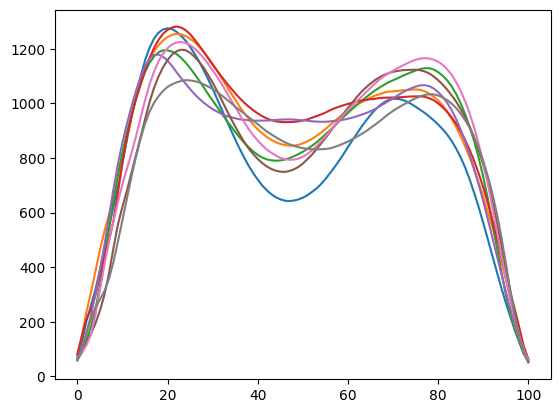

In [153]:
for i in range(0,loadsol_right_non_exo_35kg_flat_un.shape[0]):
    plt.plot(loadsol_right_non_exo_35kg_flat_un.iloc[i,:])

## Find impact and active peak

In [269]:
def calculate_peaks(df):
    first_peaks = []
    second_peaks = []

    for i in range(0,8):
        data = df.iloc[i,:]
        idx, peaks = find_peaks(data, height=700)
        first_peaks.append(peaks['peak_heights'][0])
        second_peaks.append(peaks['peak_heights'][-1])
        plt.plot(data)
        plt.plot(idx, data[idx], "x")
        plt.show()
    return first_peaks, second_peaks

### Loadsol

#### Flat

In [ ]:
loadsol_left_impact_25kg_flat, loadsol_left_active_25kg_flat = calculate_peaks(loadsol_left_non_exo_25kg_flat_un)

In [ ]:
loadsol_left_impact_35kg_flat, loadsol_left_active_35kg_flat = calculate_peaks(loadsol_left_non_exo_35kg_flat_un)

In [ ]:
loadsol_right_impact_25kg_flat, loadsol_right_active_25kg_flat = calculate_peaks(loadsol_right_non_exo_25kg_flat_un)

In [ ]:
loadsol_right_impact_35kg_flat, loadsol_right_active_35kg_flat = calculate_peaks(loadsol_right_non_exo_35kg_flat_un)

#### Incline

In [ ]:
loadsol_left_impact_25kg_incline, loadsol_left_active_25kg_incline = calculate_peaks(loadsol_left_non_exo_25kg_incline_un)

In [ ]:
loadsol_left_impact_35kg_incline, loadsol_left_active_35kg_incline = calculate_peaks(loadsol_left_non_exo_35kg_incline_un)

In [ ]:
loadsol_right_impact_25kg_incline, loadsol_right_active_25kg_incline = calculate_peaks(loadsol_right_non_exo_25kg_incline_un)

In [ ]:
loadsol_right_impact_35kg_incline, loadsol_right_active_35kg_incline = calculate_peaks(loadsol_right_non_exo_35kg_incline_un)

#### Decline

In [ ]:
loadsol_left_impact_25kg_decline, loadsol_left_active_25kg_decline = calculate_peaks(loadsol_left_non_exo_25kg_decline_un)

In [ ]:
loadsol_left_impact_35kg_decline, loadsol_left_active_35kg_decline = calculate_peaks(loadsol_left_non_exo_35kg_decline_un)

In [ ]:
loadsol_right_impact_25kg_decline, loadsol_right_active_25kg_decline = calculate_peaks(loadsol_right_non_exo_25kg_decline_un)

In [ ]:
loadsol_right_impact_35kg_decline, loadsol_right_active_35kg_decline = calculate_peaks(loadsol_right_non_exo_35kg_decline_un)

### Bertec

#### Flat

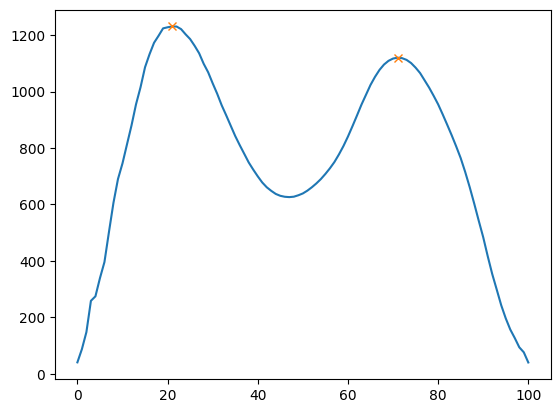

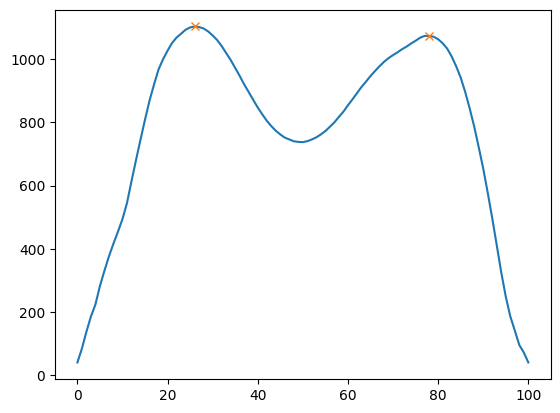

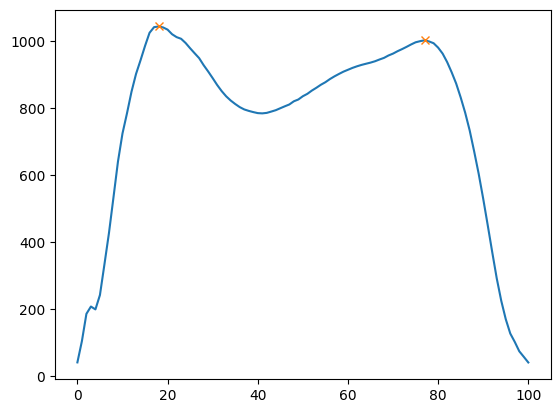

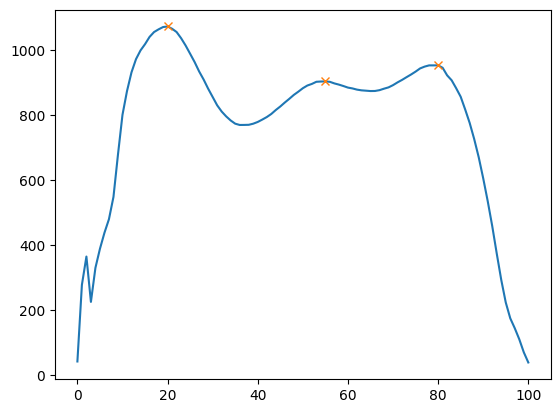

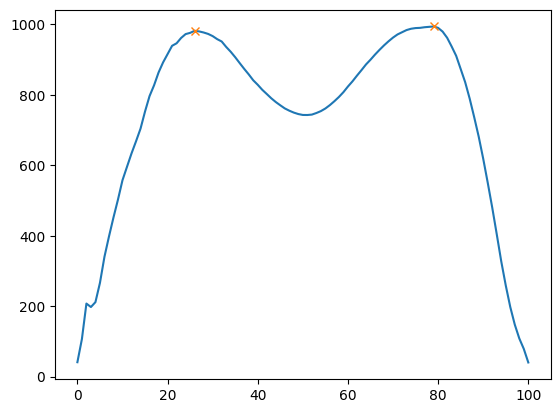

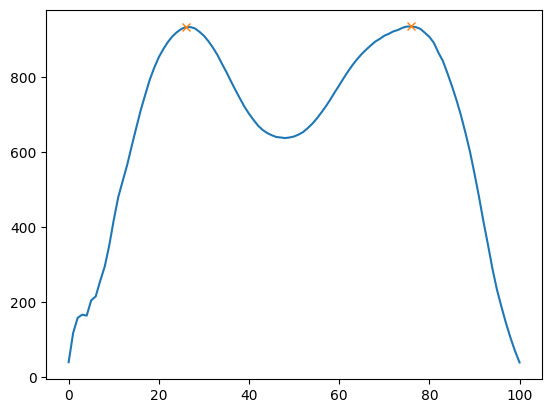

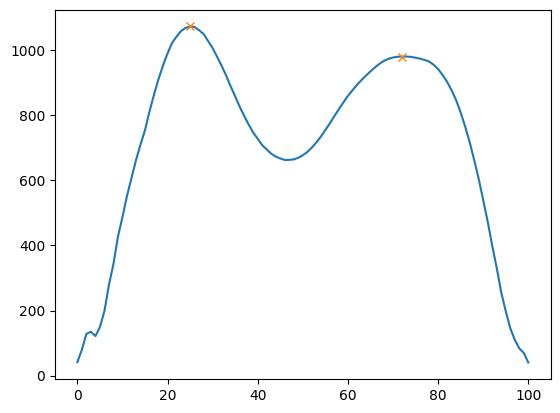

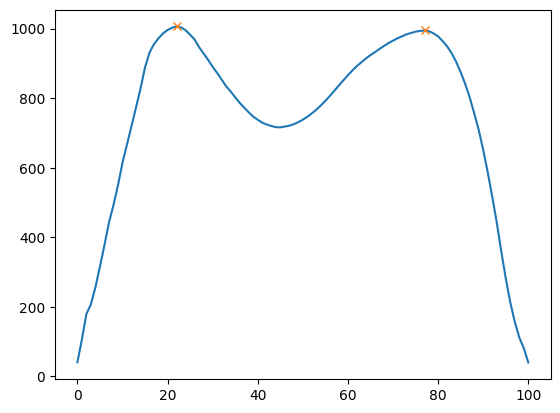

In [294]:
bertec_left_impact_25kg_flat, bertec_left_active_25kg_flat = calculate_peaks(bertec_left_non_exo_25kg_flat_un)

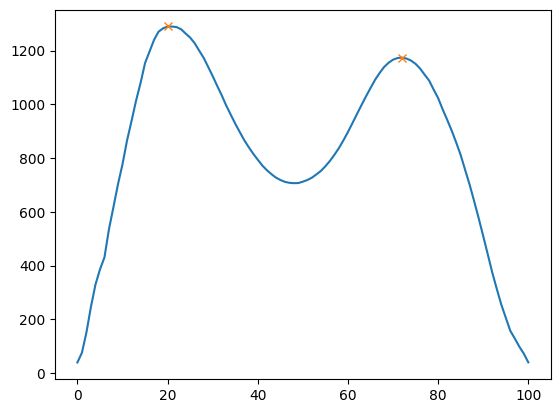

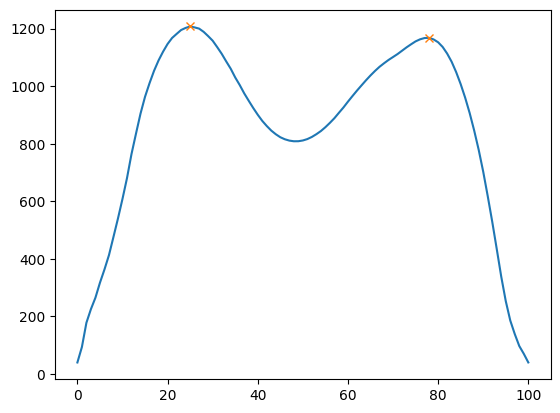

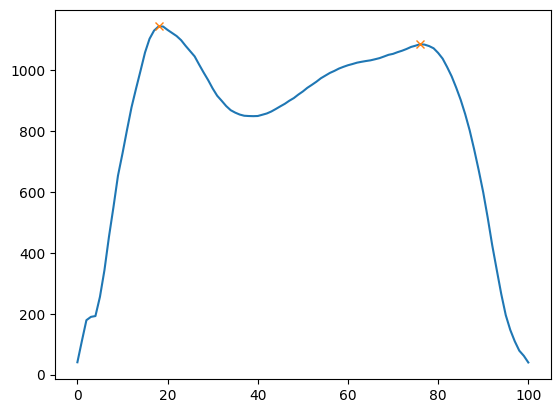

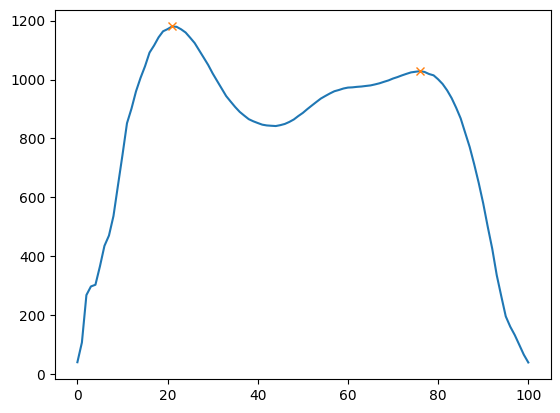

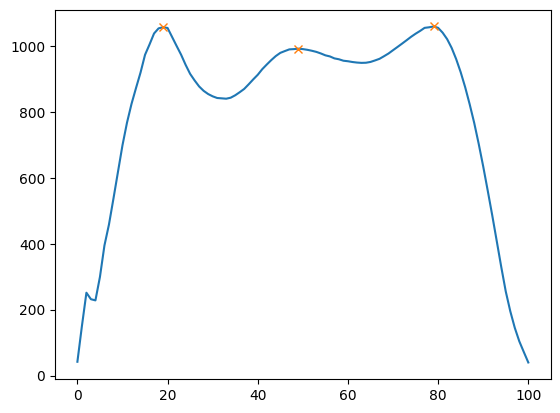

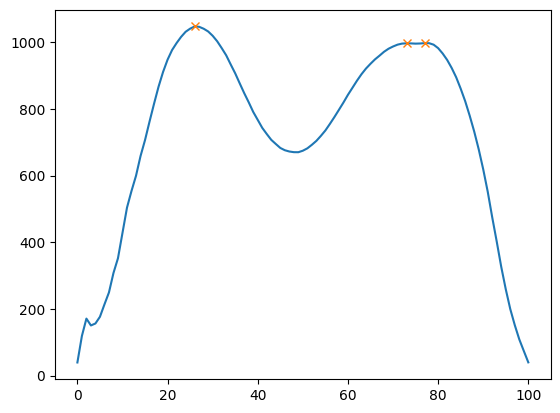

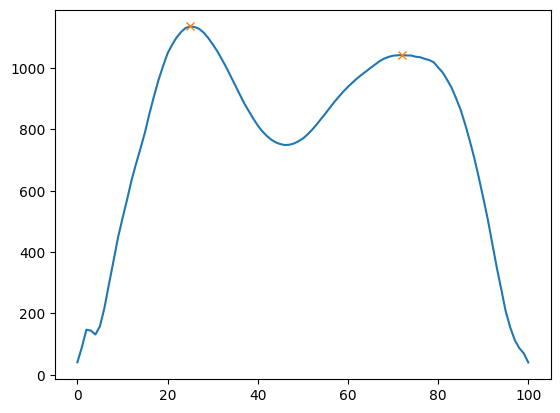

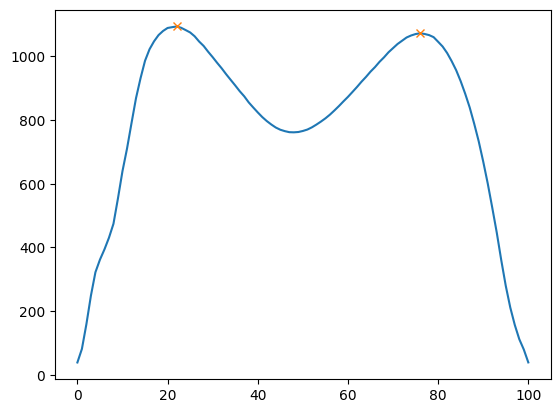

In [295]:
bertec_left_impact_35kg_flat, bertec_left_active_35kg_flat = calculate_peaks(bertec_left_non_exo_35kg_flat_un)

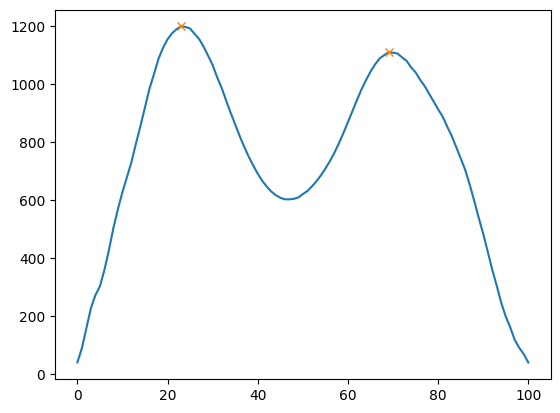

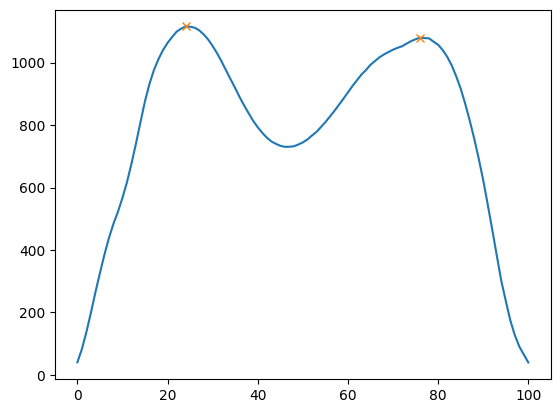

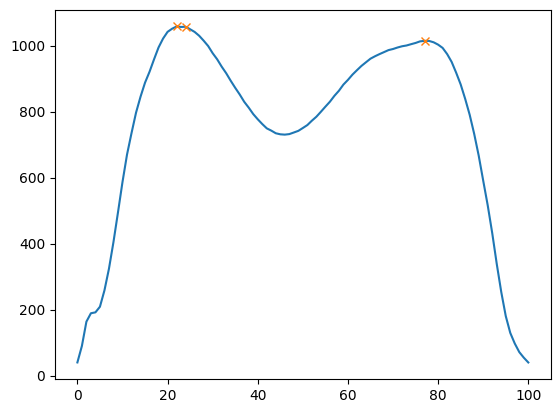

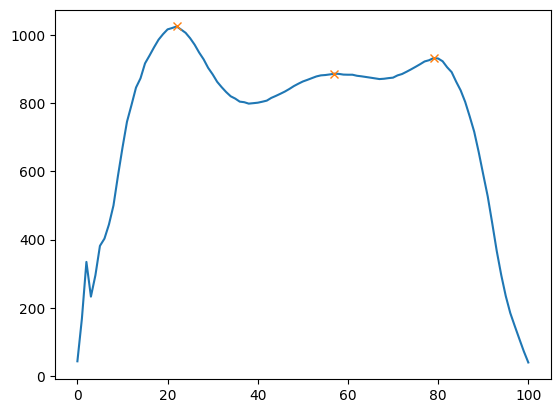

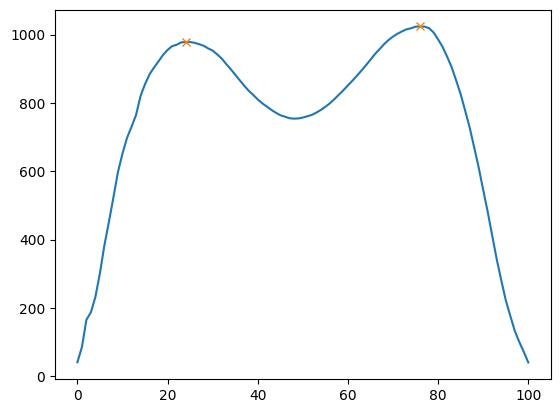

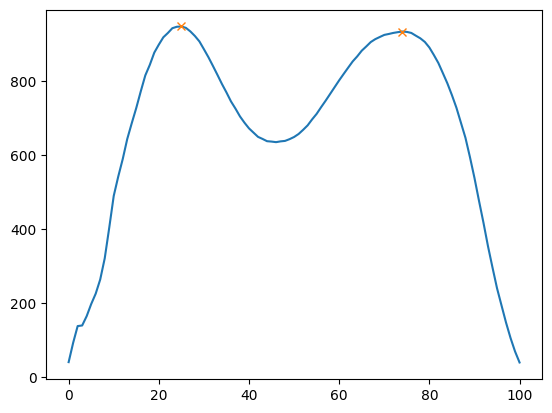

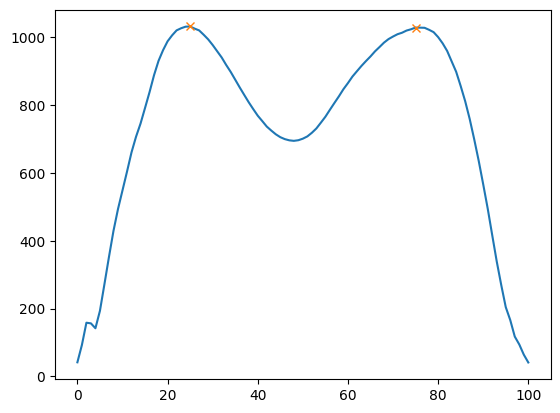

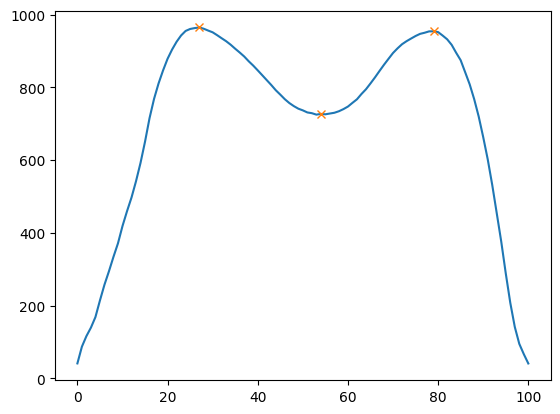

In [296]:
bertec_right_impact_25kg_flat, bertec_right_active_25kg_flat = calculate_peaks(bertec_right_non_exo_25kg_flat_un)

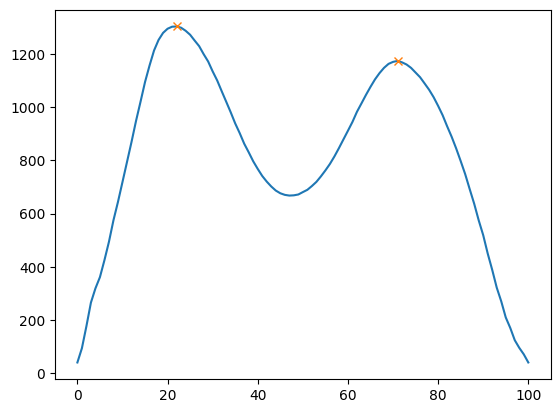

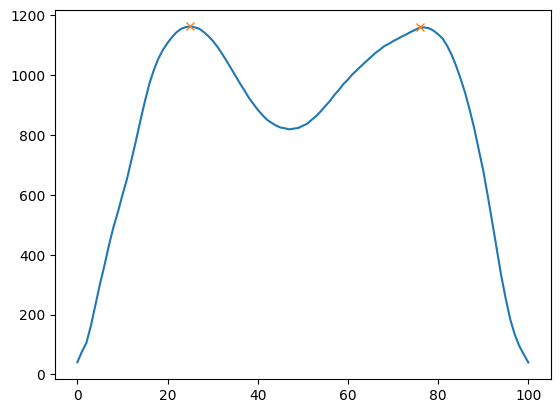

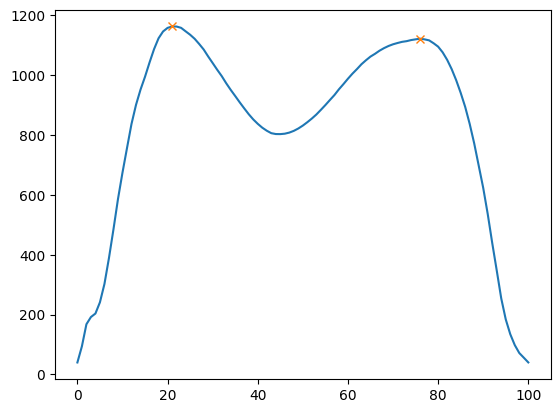

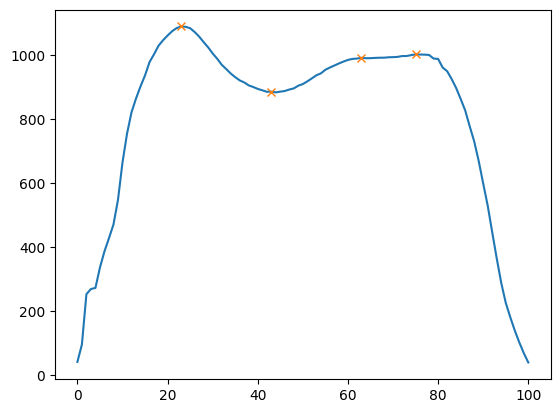

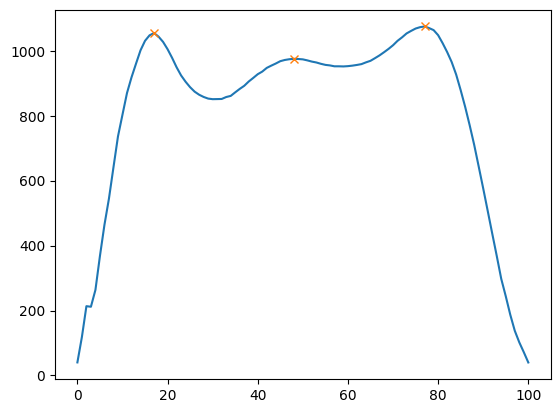

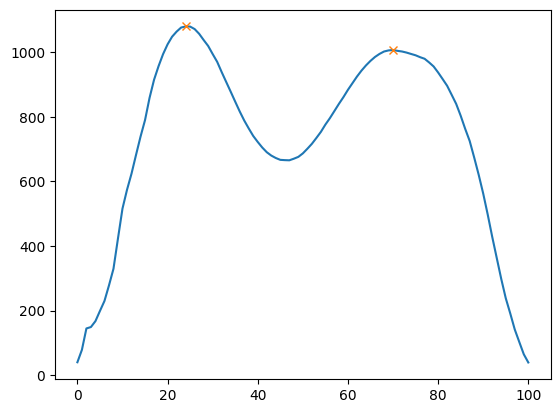

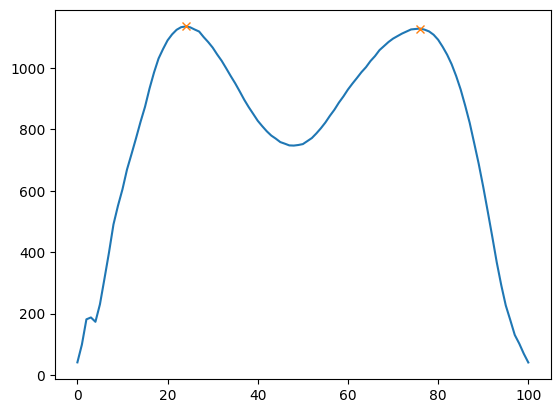

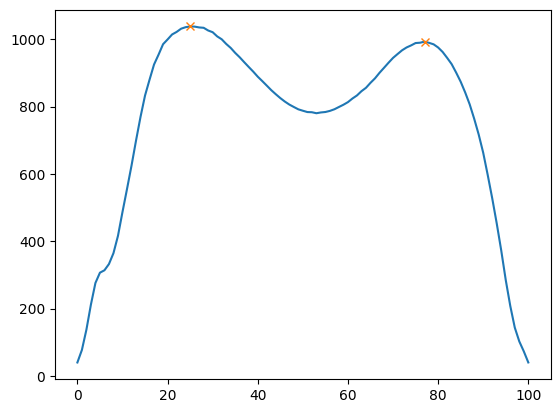

In [297]:
bertec_right_impact_35kg_flat, bertec_right_active_35kg_flat = calculate_peaks(bertec_right_non_exo_35kg_flat_un)

#### Incline

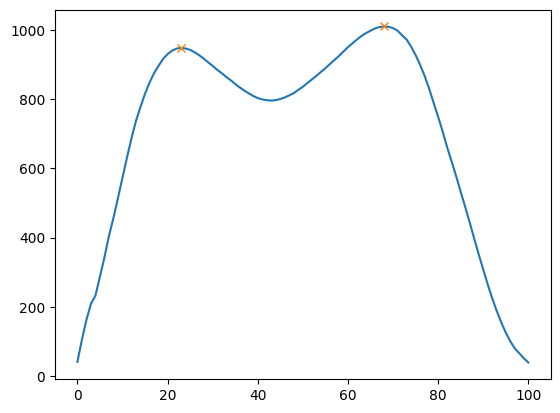

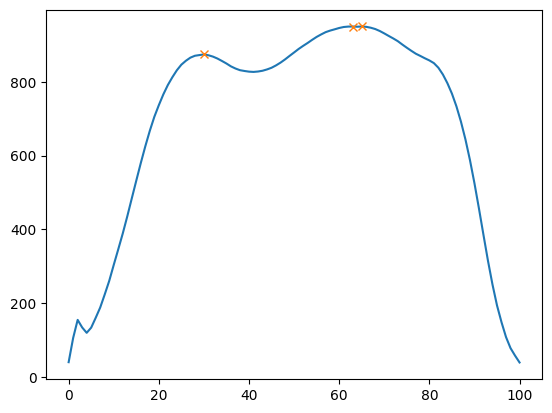

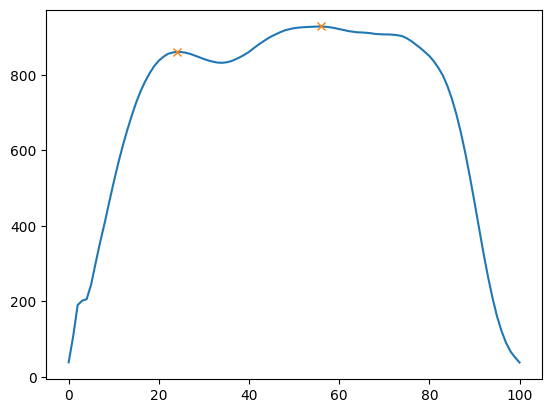

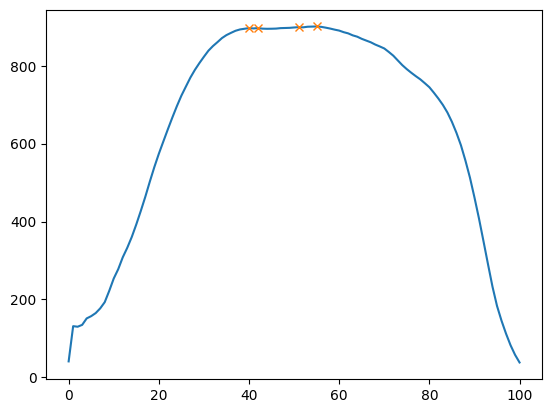

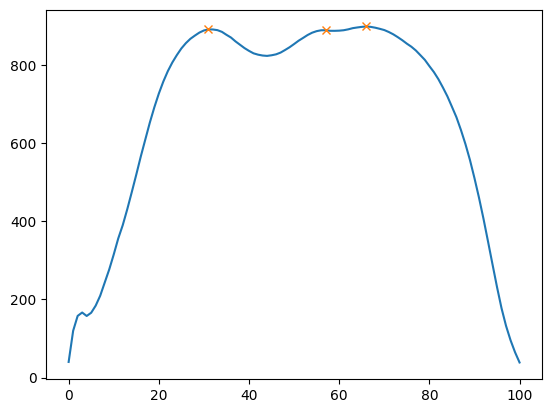

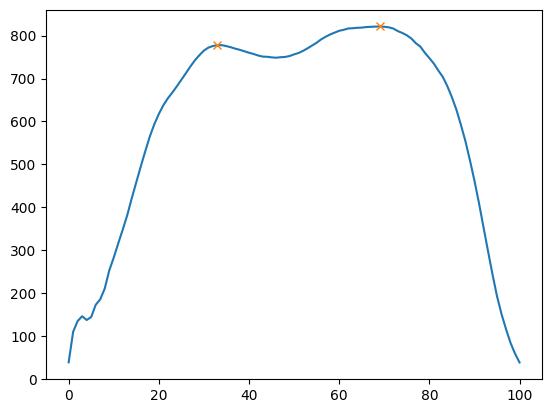

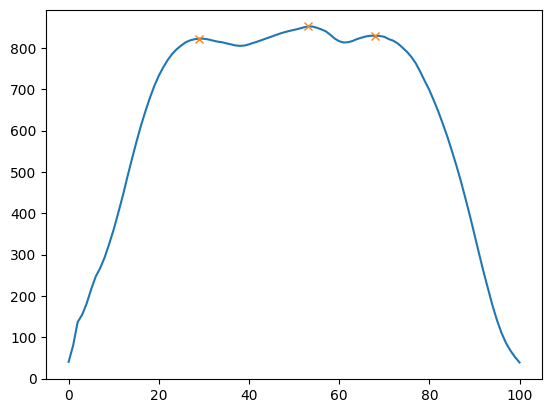

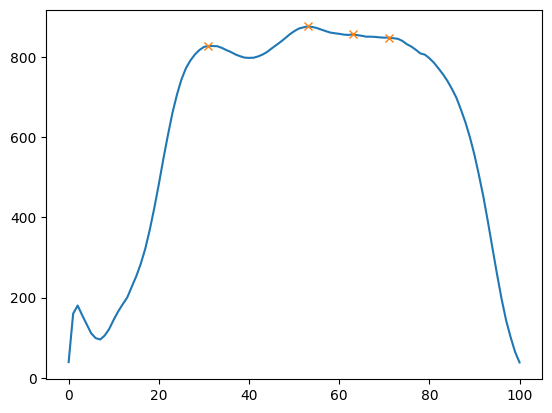

In [298]:
bertec_left_impact_25kg_incline, bertec_left_active_25kg_incline = calculate_peaks(bertec_left_non_exo_25kg_incline_un)

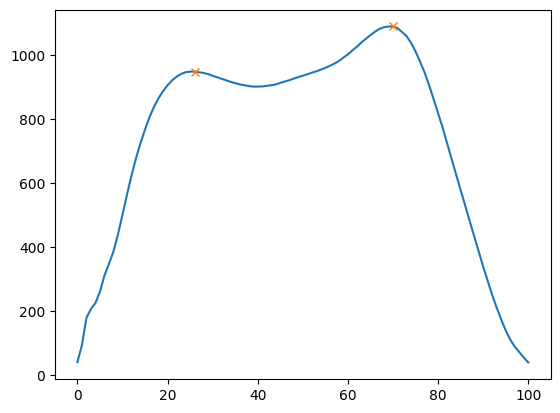

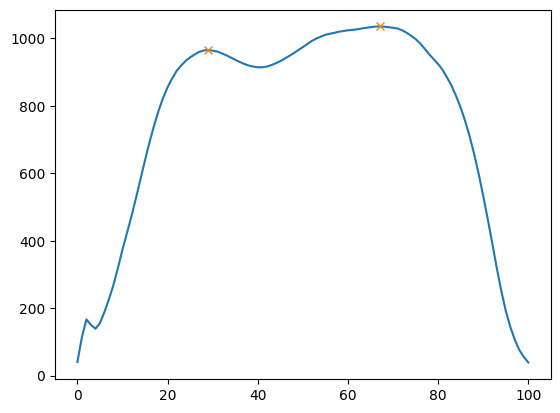

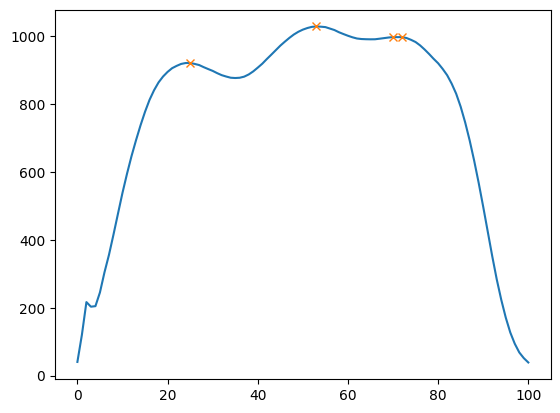

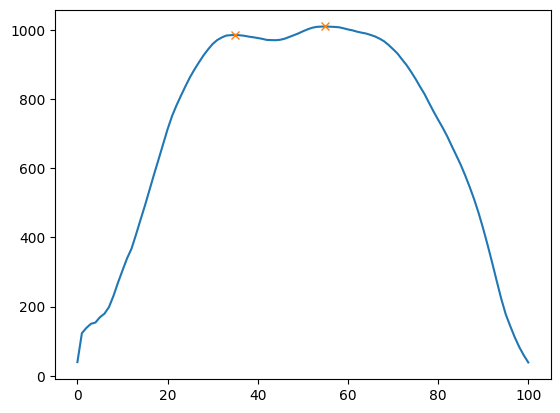

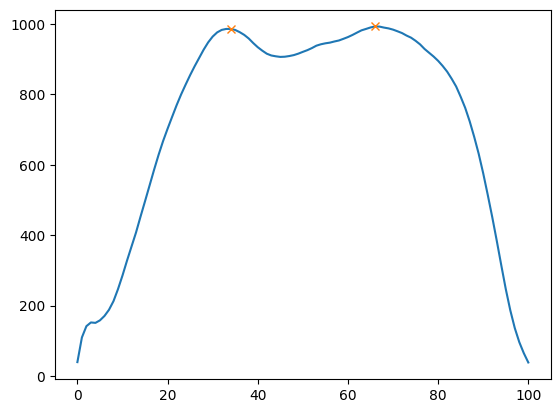

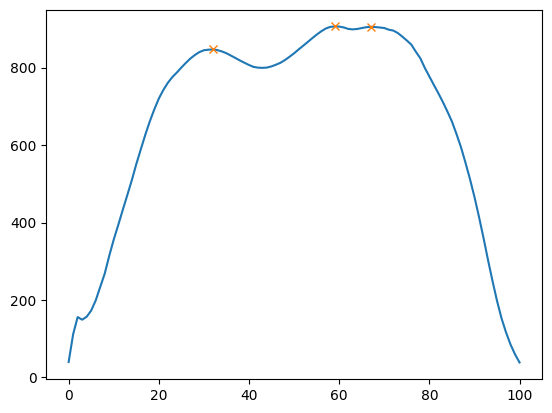

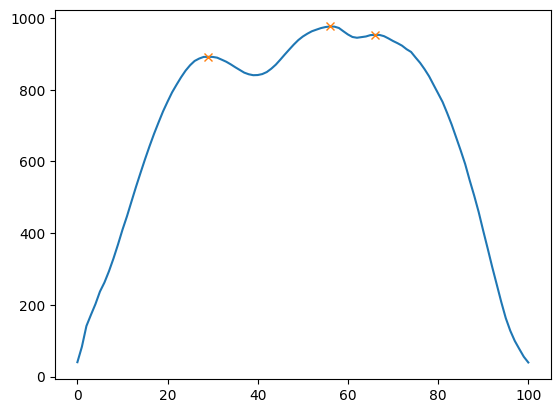

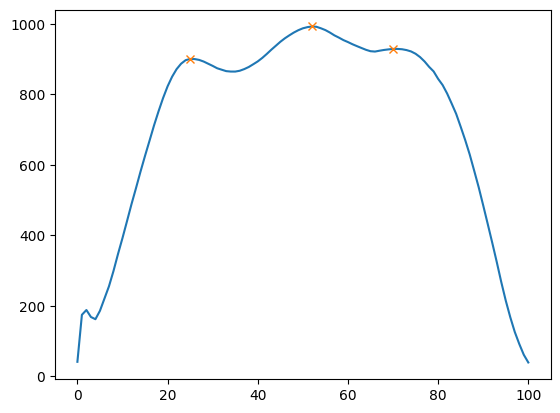

In [299]:
bertec_left_impact_35kg_incline, bertec_left_active_35kg_incline = calculate_peaks(bertec_left_non_exo_35kg_incline_un)

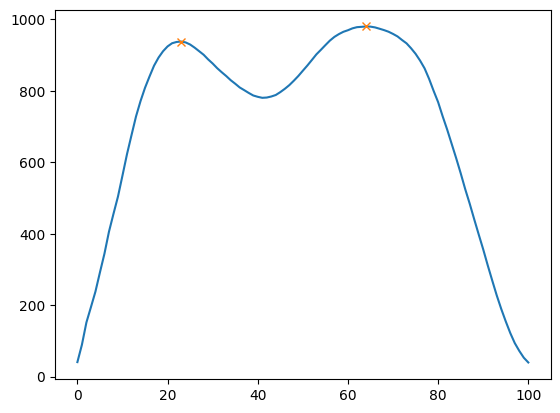

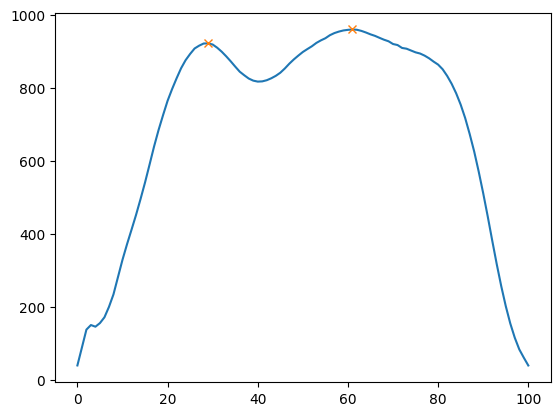

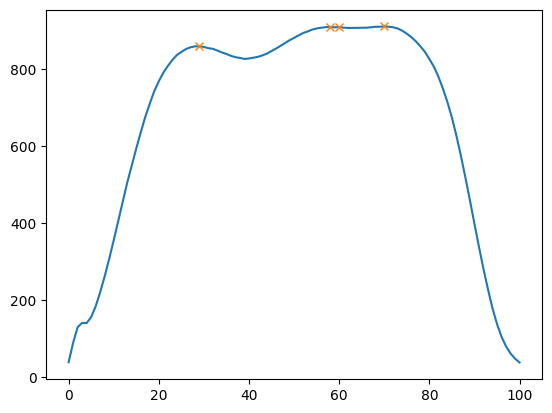

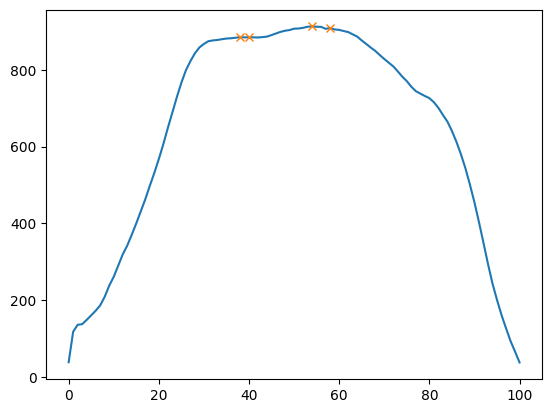

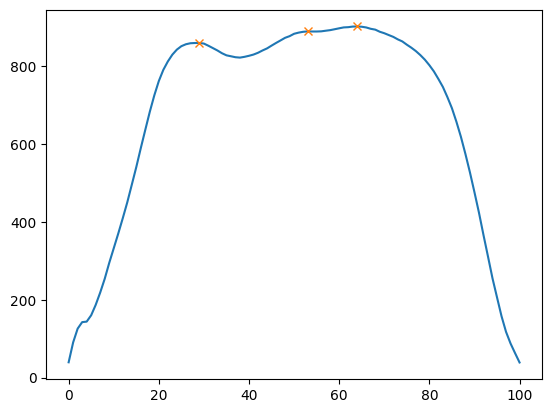

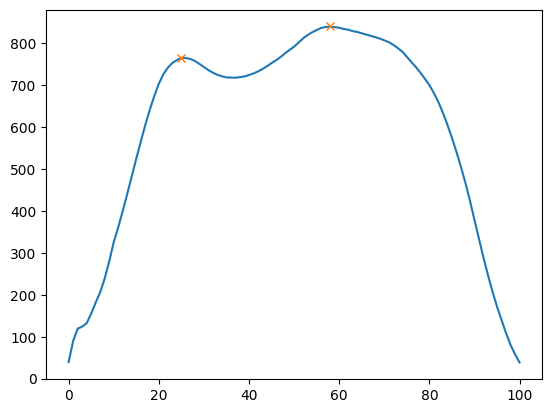

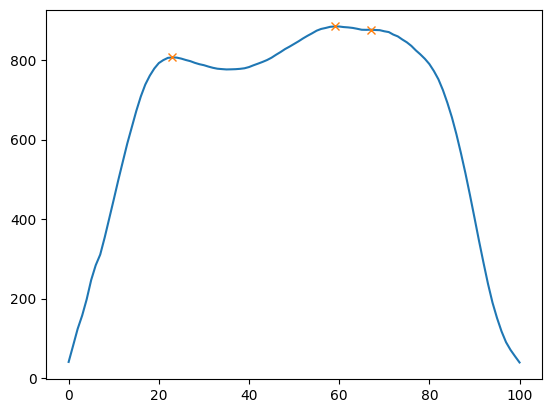

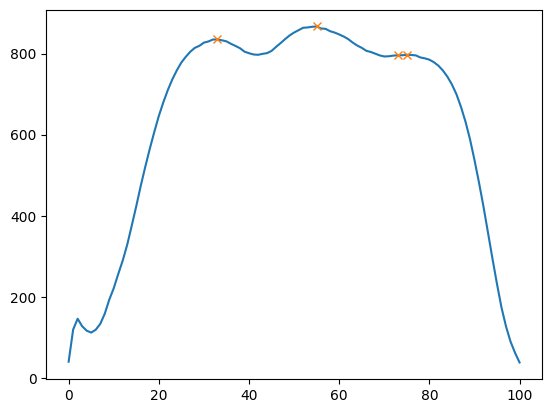

In [300]:
bertec_right_impact_25kg_incline, bertec_right_active_25kg_incline = calculate_peaks(bertec_right_non_exo_25kg_incline_un)

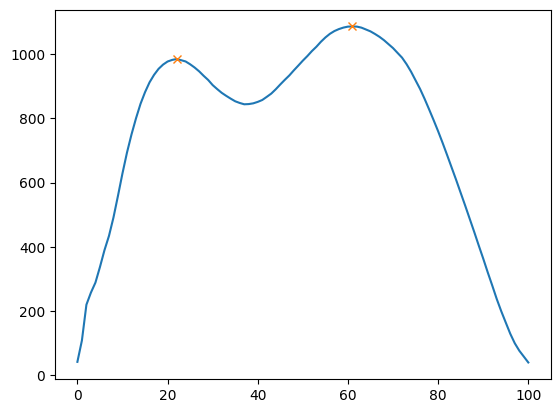

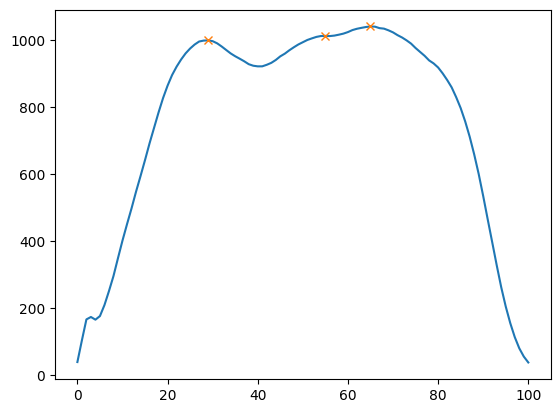

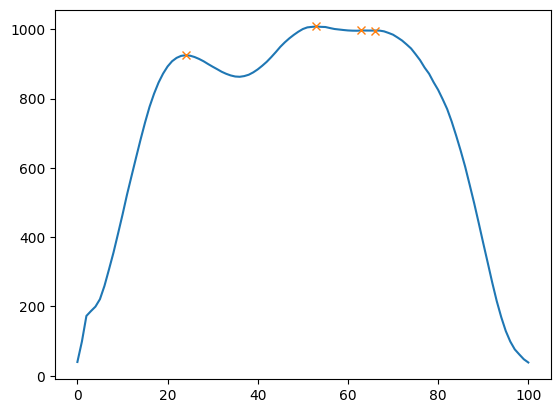

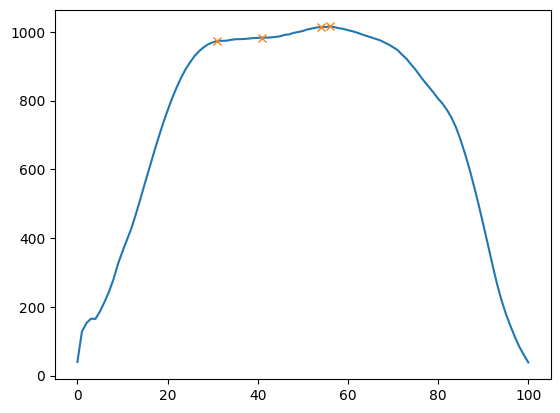

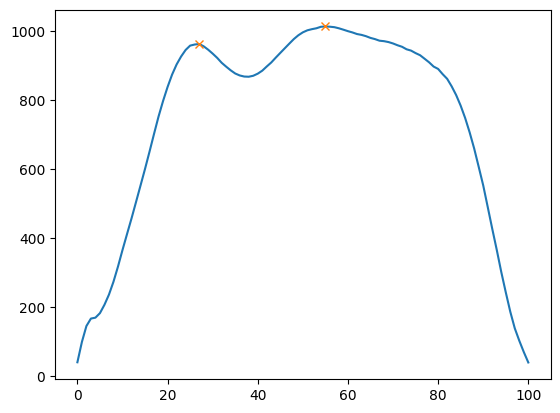

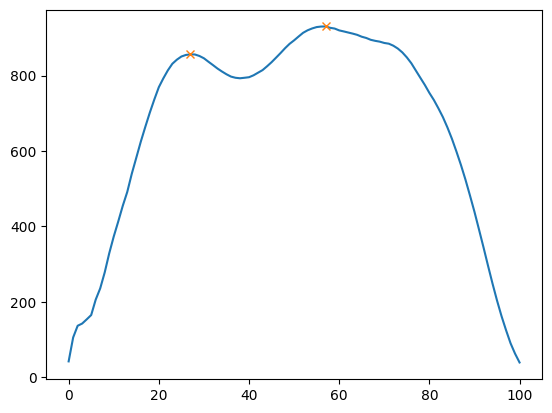

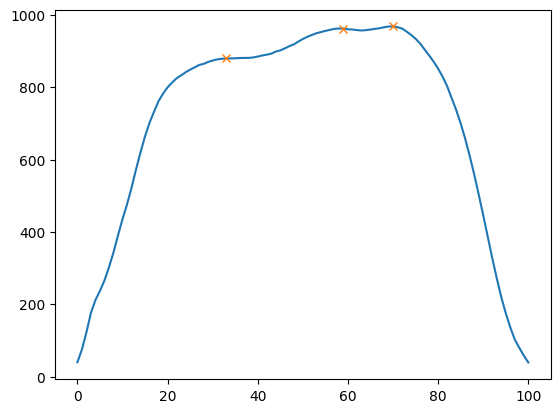

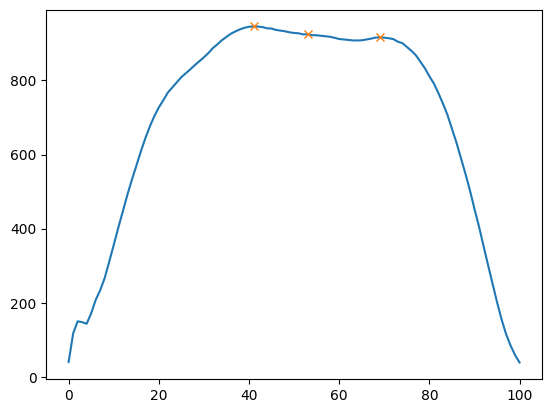

In [301]:
bertec_right_impact_35kg_incline, bertec_right_active_35kg_incline = calculate_peaks(bertec_right_non_exo_35kg_incline_un)

#### Decline

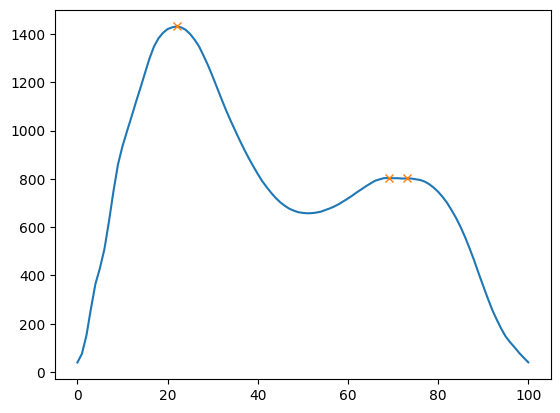

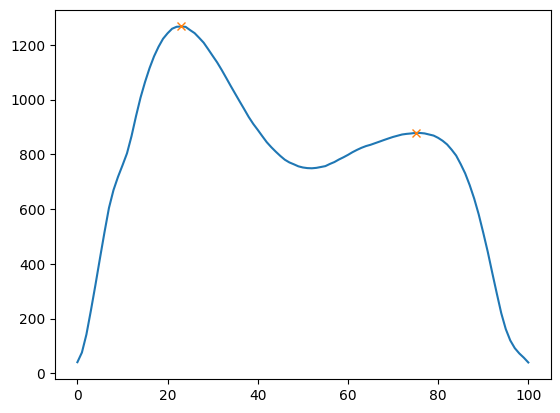

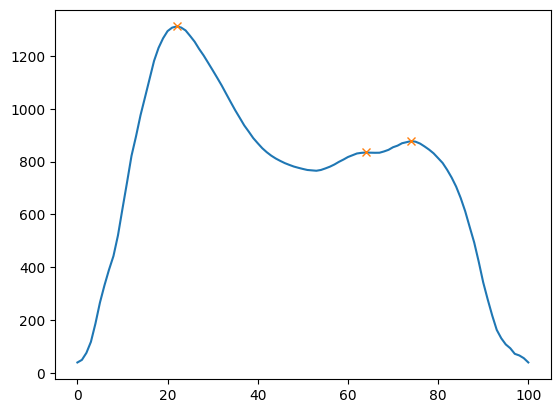

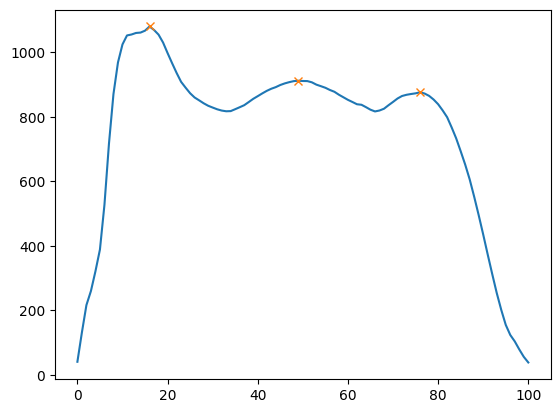

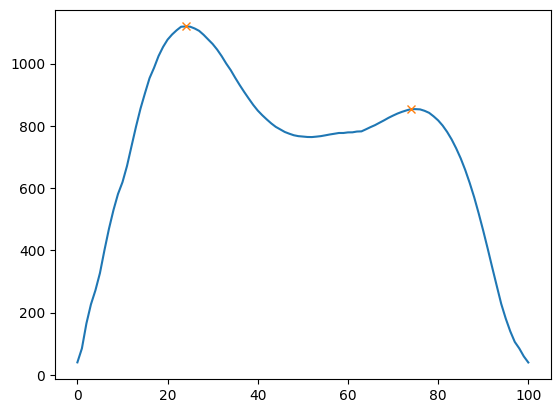

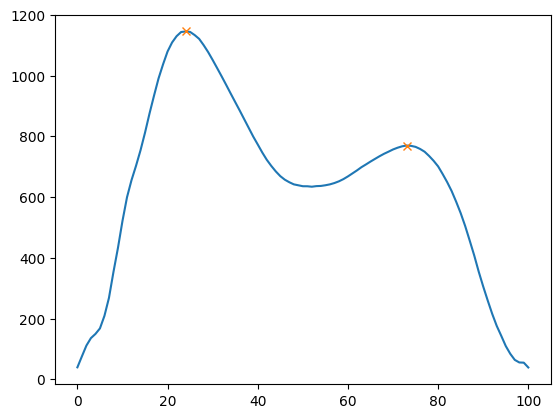

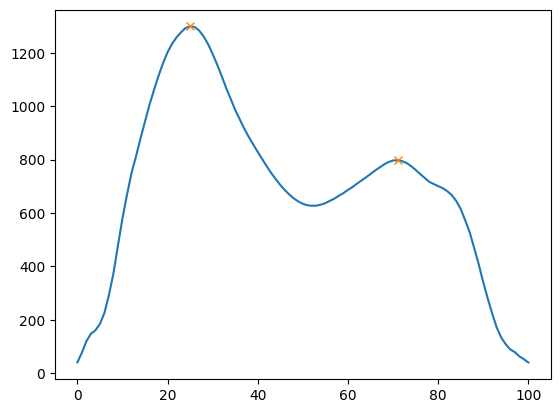

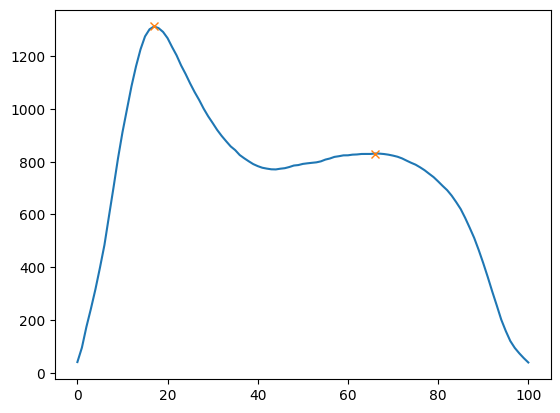

In [307]:
bertec_left_impact_25kg_decline, bertec_left_active_25kg_decline = calculate_peaks(bertec_left_non_exo_25kg_decline_un)

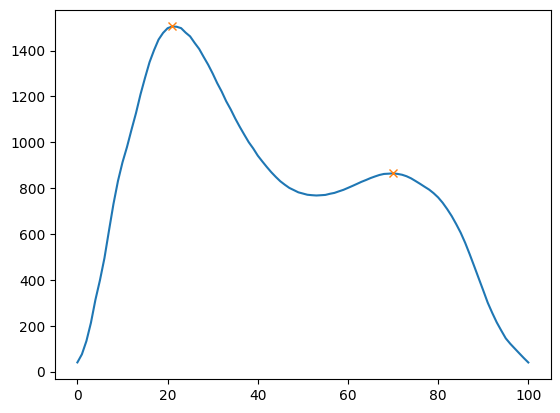

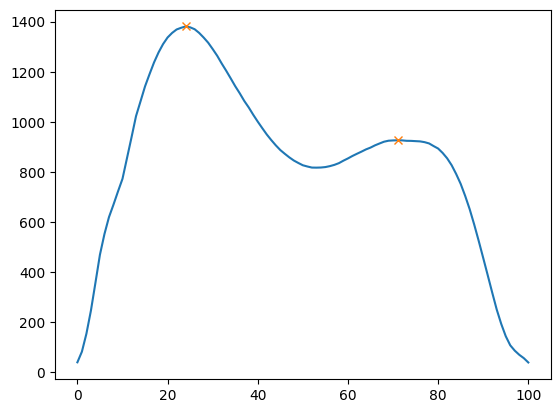

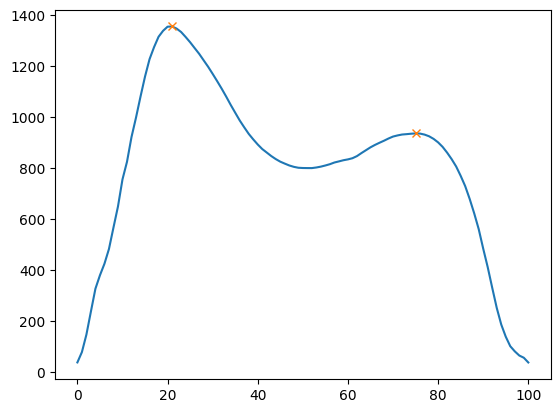

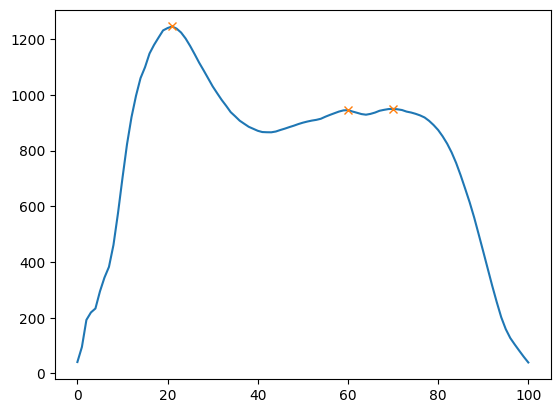

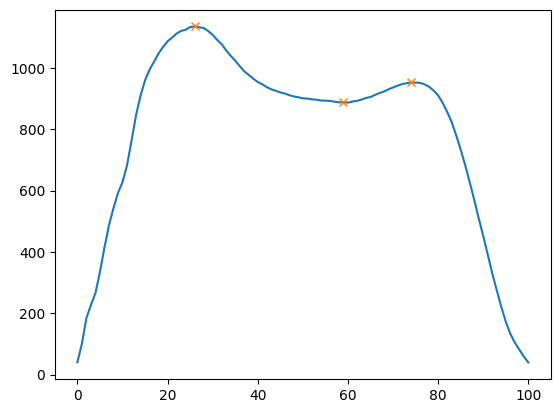

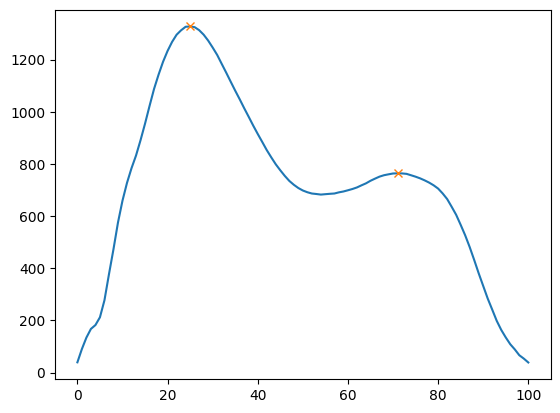

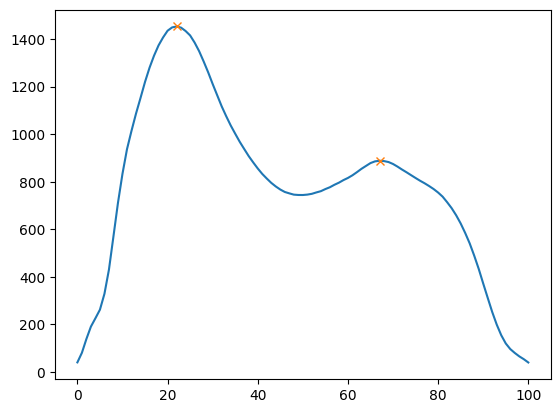

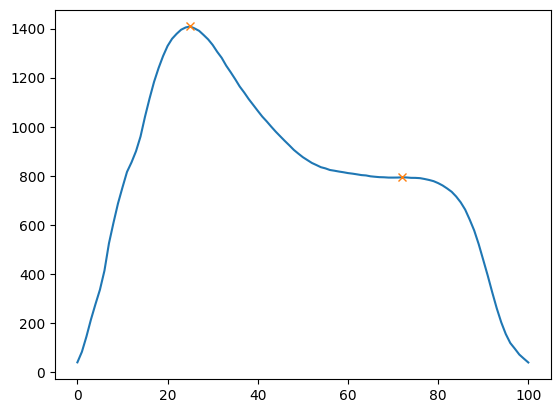

In [303]:
bertec_left_impact_35kg_decline, bertec_left_active_35kg_decline = calculate_peaks(bertec_left_non_exo_35kg_decline_un)

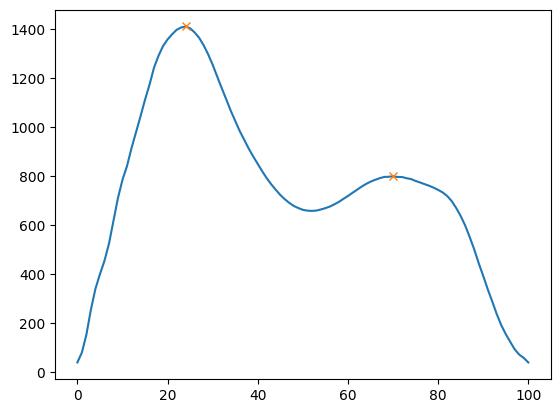

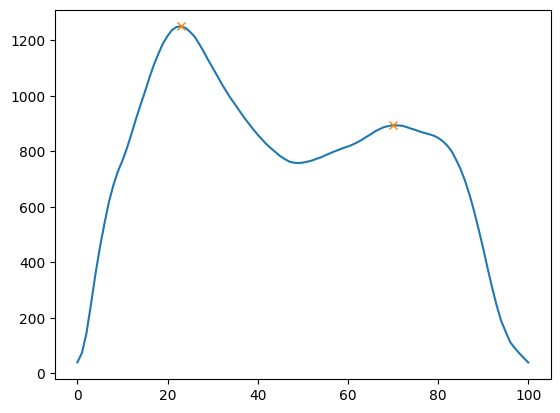

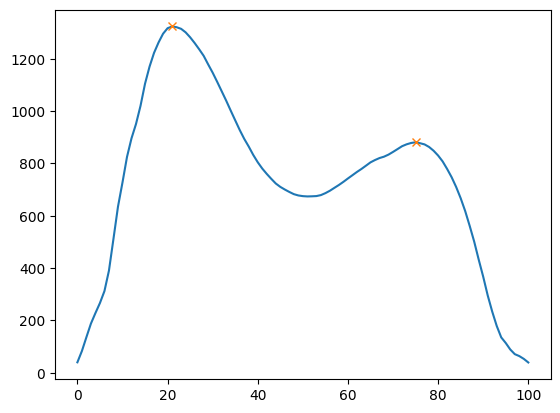

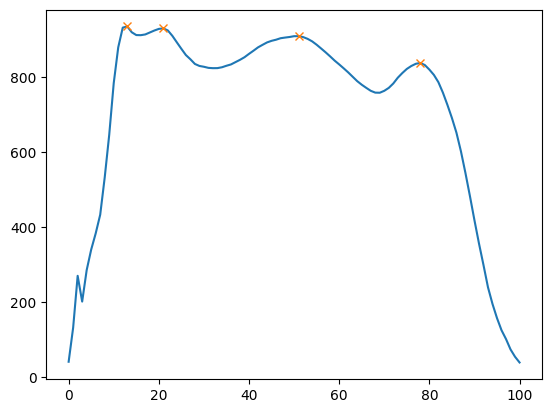

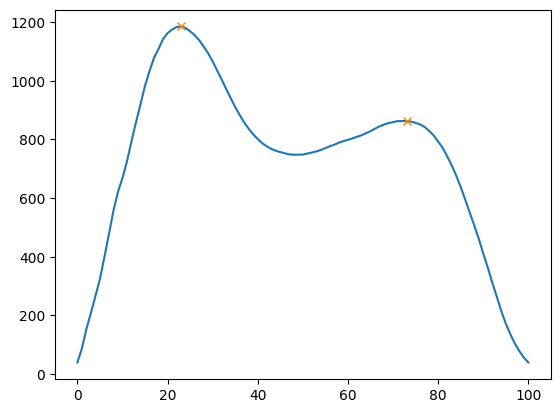

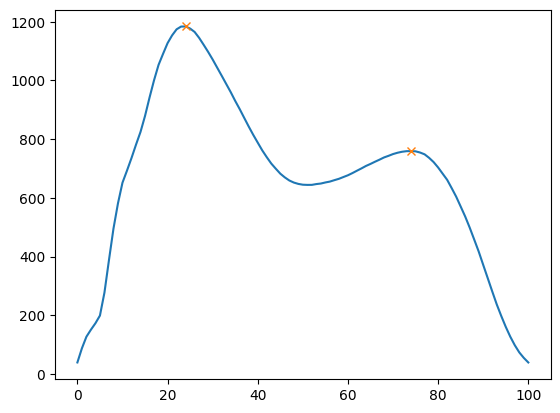

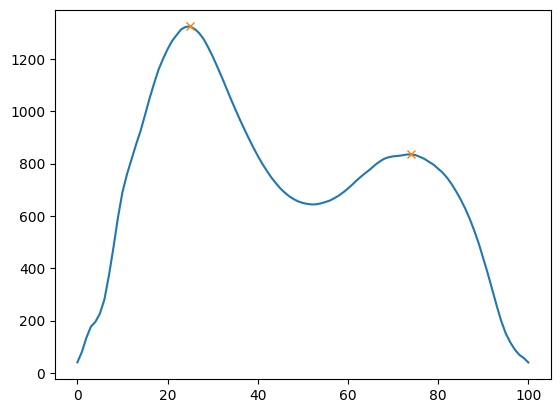

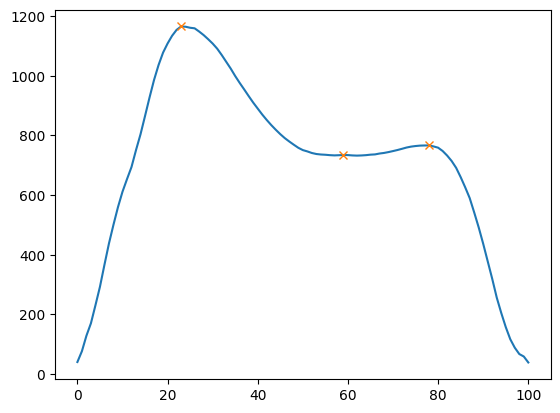

In [304]:
bertec_right_impact_25kg_decline, bertec_right_active_25kg_decline = calculate_peaks(bertec_right_non_exo_25kg_decline_un)

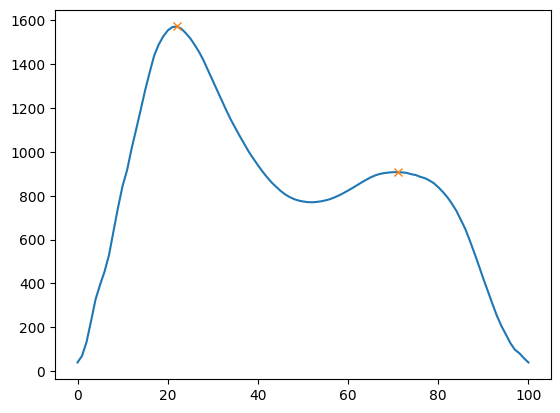

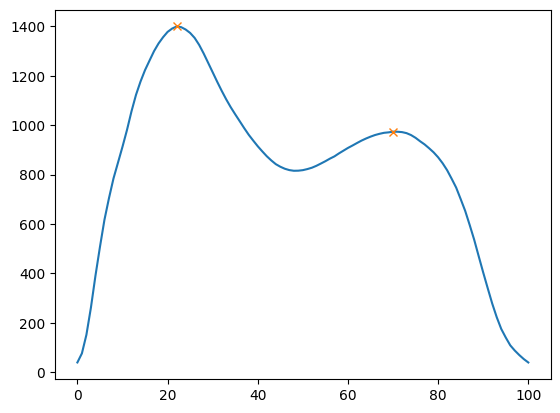

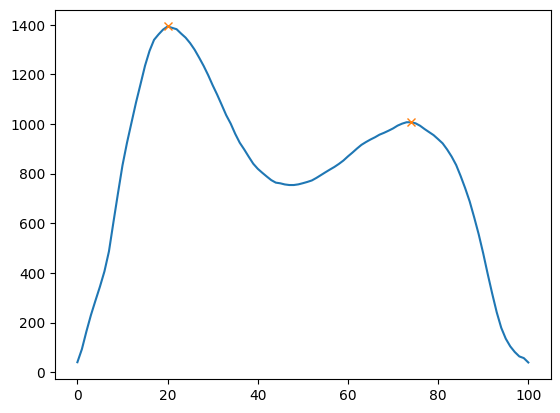

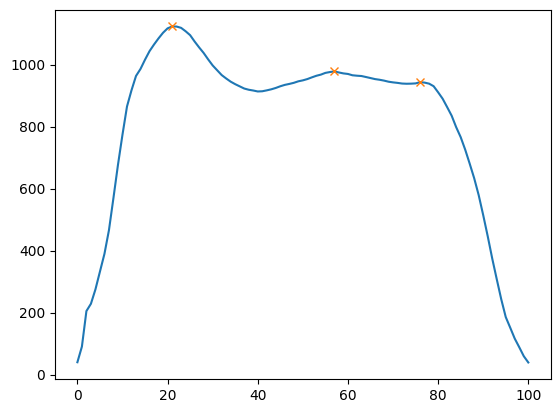

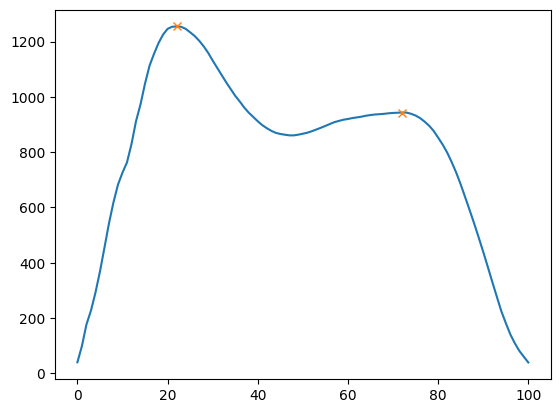

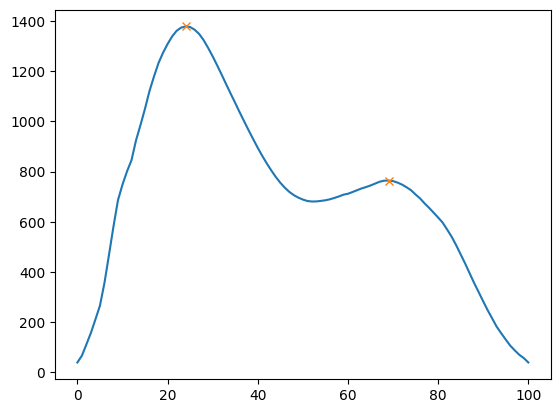

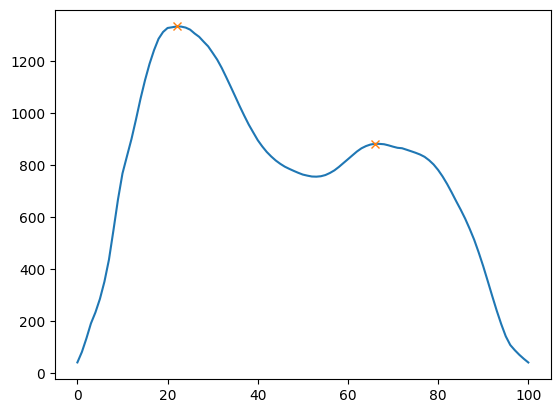

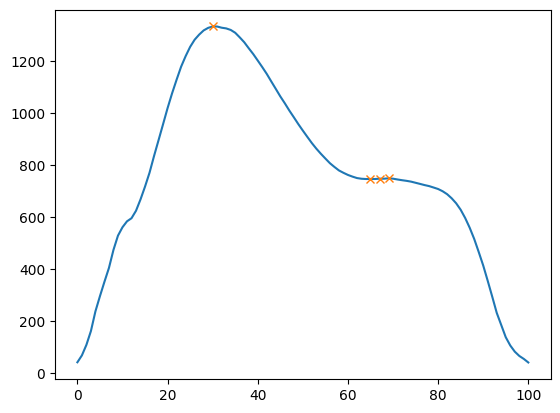

In [305]:
bertec_right_impact_35kg_decline, bertec_right_active_35kg_decline = calculate_peaks(bertec_right_non_exo_35kg_decline_un)

### Compile impact forces

#### 25kg

In [308]:
print('Mean of loadsol_left_impact_25kg_flat:',statistics.mean(loadsol_left_impact_25kg_flat))
print('Mean of bertec_left_impact_25kg_flat:',statistics.mean(bertec_left_impact_25kg_flat))

print('Mean of loadsol_left_impact_25kg_incline:',statistics.mean(loadsol_left_impact_25kg_incline))
print('Mean of bertec_left_impact_25kg_incline:',statistics.mean(bertec_left_impact_25kg_incline))

print('Mean of loadsol_left_impact_25kg_decline:',statistics.mean(loadsol_left_impact_25kg_decline))
print('Mean of bertec_left_impact_25kg_decline:',statistics.mean(bertec_left_impact_25kg_decline))

Mean of loadsol_left_impact_25kg_flat: 1128.26139255
Mean of bertec_left_impact_25kg_flat: 1055.7430889625
Mean of loadsol_left_impact_25kg_incline: 912.2105142000001
Mean of bertec_left_impact_25kg_incline: 862.610492025
Mean of loadsol_left_impact_25kg_decline: 1319.0195770875002
Mean of bertec_left_impact_25kg_decline: 1245.589213275


In [313]:
print('Mean of loadsol_right_impact_25kg_flat:',statistics.mean(loadsol_right_impact_25kg_flat))
print('Mean of bertec_right_impact_25kg_flat:',statistics.mean(bertec_right_impact_25kg_flat))

print('Mean of loadsol_right_impact_25kg_incline:',statistics.mean(loadsol_right_impact_25kg_incline))
print('Mean of bertec_right_impact_25kg_incline:',statistics.mean(bertec_right_impact_25kg_incline))

print('Mean of loadsol_right_impact_25kg_decline:',statistics.mean(loadsol_right_impact_25kg_decline))
print('Mean of bertec_right_impact_25kg_decline:',statistics.mean(bertec_right_impact_25kg_decline))

Mean of loadsol_right_impact_25kg_flat: 1148.312664675
Mean of bertec_right_impact_25kg_flat: 1040.1368504625002
Mean of loadsol_right_impact_25kg_incline: 930.0246035625
Mean of bertec_right_impact_25kg_incline: 858.7299135375
Mean of loadsol_right_impact_25kg_decline: 1360.424313
Mean of bertec_right_impact_25kg_decline: 1222.2561160125001


#### 35kg

In [311]:
print('Mean of loadsol_left_impact_35kg_flat:',statistics.mean(loadsol_left_impact_35kg_flat))
print('Mean of bertec_left_impact_35kg_flat:',statistics.mean(bertec_left_impact_35kg_flat))

print('Mean of loadsol_left_impact_35kg_incline:',statistics.mean(loadsol_left_impact_35kg_incline))
print('Mean of bertec_left_impact_35kg_incline:',statistics.mean(bertec_left_impact_35kg_incline))

print('Mean of loadsol_left_impact_35kg_decline:',statistics.mean(loadsol_left_impact_35kg_decline))
print('Mean of bertec_left_impact_35kg_decline:',statistics.mean(bertec_left_impact_35kg_decline))

Mean of loadsol_left_impact_35kg_flat: 1192.5887630625002
Mean of bertec_left_impact_35kg_flat: 1144.2634522875
Mean of loadsol_left_impact_35kg_incline: 978.4506875625001
Mean of bertec_left_impact_35kg_incline: 930.6006222375
Mean of loadsol_left_impact_35kg_decline: 1415.8994706
Mean of bertec_left_impact_35kg_decline: 1351.2700011375


In [312]:
print('Mean of loadsol_right_impact_35kg_flat:',statistics.mean(loadsol_right_impact_35kg_flat))
print('Mean of bertec_right_impact_35kg_flat:',statistics.mean(bertec_right_impact_35kg_flat))

print('Mean of loadsol_right_impact_35kg_incline:',statistics.mean(loadsol_right_impact_35kg_incline))
print('Mean of bertec_right_impact_35kg_incline:',statistics.mean(bertec_right_impact_35kg_incline))

print('Mean of loadsol_right_impact_35kg_decline:',statistics.mean(loadsol_right_impact_35kg_decline))
print('Mean of bertec_right_impact_35kg_decline:',statistics.mean(bertec_right_impact_35kg_decline))

Mean of loadsol_right_impact_35kg_flat: 1211.0743837125
Mean of bertec_right_impact_35kg_flat: 1128.1965484500001
Mean of loadsol_right_impact_35kg_incline: 1002.4007357250001
Mean of bertec_right_impact_35kg_incline: 940.9274130375001
Mean of loadsol_right_impact_35kg_decline: 1489.4329252500002
Mean of bertec_right_impact_35kg_decline: 1347.9137058375


### Compile active forces

#### 25kg

In [314]:
print('Mean of loadsol_left_active_25kg_flat:',statistics.mean(loadsol_left_active_25kg_flat))
print('Mean of bertec_left_active_25kg_flat:',statistics.mean(bertec_left_active_25kg_flat))

print('Mean of loadsol_left_active_25kg_incline:',statistics.mean(loadsol_left_active_25kg_incline))
print('Mean of bertec_left_active_25kg_incline:',statistics.mean(bertec_left_active_25kg_incline))

print('Mean of loadsol_left_active_25kg_decline:',statistics.mean(loadsol_left_active_25kg_decline))
print('Mean of bertec_left_active_25kg_decline:',statistics.mean(bertec_left_active_25kg_decline))

Mean of loadsol_left_active_25kg_flat: 1016.914581675
Mean of bertec_left_active_25kg_flat: 1006.8343284375001
Mean of loadsol_left_active_25kg_incline: 918.0872314875
Mean of bertec_left_active_25kg_incline: 898.5182925375001
Mean of loadsol_left_active_25kg_decline: 868.70144745
Mean of bertec_left_active_25kg_decline: 835.7332134375001


In [315]:
print('Mean of loadsol_right_active_25kg_flat:',statistics.mean(loadsol_right_active_25kg_flat))
print('Mean of bertec_right_active_25kg_flat:',statistics.mean(bertec_right_active_25kg_flat))

print('Mean of loadsol_right_active_25kg_incline:',statistics.mean(loadsol_right_active_25kg_incline))
print('Mean of bertec_right_active_25kg_incline:',statistics.mean(bertec_right_active_25kg_incline))

print('Mean of loadsol_right_active_25kg_decline:',statistics.mean(loadsol_right_active_25kg_decline))
print('Mean of bertec_right_active_25kg_decline:',statistics.mean(bertec_right_active_25kg_decline))

Mean of loadsol_right_active_25kg_flat: 1019.1324510000001
Mean of bertec_right_active_25kg_flat: 1009.7027969625
Mean of loadsol_right_active_25kg_incline: 918.8453850750001
Mean of bertec_right_active_25kg_incline: 896.8011746625
Mean of loadsol_right_active_25kg_decline: 885.0570350625001
Mean of bertec_right_active_25kg_decline: 829.6895912625


#### 35kg

In [316]:
print('Mean of loadsol_left_active_35kg_flat:',statistics.mean(loadsol_left_active_35kg_flat))
print('Mean of bertec_left_active_35kg_flat:',statistics.mean(bertec_left_active_35kg_flat))

print('Mean of loadsol_left_active_35kg_incline:',statistics.mean(loadsol_left_active_35kg_incline))
print('Mean of bertec_left_active_35kg_incline:',statistics.mean(bertec_left_active_35kg_incline))

print('Mean of loadsol_left_active_35kg_decline:',statistics.mean(loadsol_left_active_35kg_decline))
print('Mean of bertec_left_active_35kg_decline:',statistics.mean(bertec_left_active_35kg_decline))

Mean of loadsol_left_active_35kg_flat: 1085.822179875
Mean of bertec_left_active_35kg_flat: 1078.367658975
Mean of loadsol_left_active_35kg_incline: 997.1760891375001
Mean of bertec_left_active_35kg_incline: 988.8098758875001
Mean of loadsol_left_active_35kg_decline: 911.4342243750001
Mean of bertec_left_active_35kg_decline: 884.4913659375001


In [317]:
print('Mean of loadsol_right_active_35kg_flat:',statistics.mean(loadsol_right_active_35kg_flat))
print('Mean of bertec_right_active_35kg_flat:',statistics.mean(bertec_right_active_35kg_flat))

print('Mean of loadsol_right_active_35kg_incline:',statistics.mean(loadsol_right_active_35kg_incline))
print('Mean of bertec_right_active_35kg_incline:',statistics.mean(bertec_right_active_35kg_incline))

print('Mean of loadsol_right_active_35kg_decline:',statistics.mean(loadsol_right_active_35kg_decline))
print('Mean of bertec_right_active_35kg_decline:',statistics.mean(bertec_right_active_35kg_decline))

Mean of loadsol_right_active_35kg_flat: 1076.13929295
Mean of bertec_right_active_35kg_flat: 1082.561041575
Mean of loadsol_right_active_35kg_incline: 1000.7107057125
Mean of bertec_right_active_35kg_incline: 995.8651175250001
Mean of loadsol_right_active_35kg_decline: 1021.7946888
Mean of bertec_right_active_35kg_decline: 896.0465281500001


# Put in dataframe

In [319]:
id = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']

## Loadsol

In [324]:
# Loadsol 25kg flat
loadsol_25kg_flat = pd.DataFrame({'ID': id,
                                  'Impact_Peak_Force_L': loadsol_left_impact_25kg_flat, 'Impact_Peak_Force_R': loadsol_right_impact_25kg_flat,
                                  'Active_Peak_Force_L': loadsol_left_active_25kg_flat,  'Active_Peak_Force_R': loadsol_right_active_25kg_flat})

# Loadsol 25kg incline
loadsol_25kg_incline = pd.DataFrame({'ID': id,
                                  'Impact_Peak_Force_L': loadsol_left_impact_25kg_incline, 'Impact_Peak_Force_R': loadsol_right_impact_25kg_incline,
                                  'Active_Peak_Force_L': loadsol_left_active_25kg_incline,  'Active_Peak_Force_R': loadsol_right_active_25kg_incline})

# Loadsol 25kg decline
loadsol_25kg_decline = pd.DataFrame({'ID': id,
                                  'Impact_Peak_Force_L': loadsol_left_impact_25kg_decline, 'Impact_Peak_Force_R': loadsol_right_impact_25kg_decline,
                                  'Active_Peak_Force_L': loadsol_left_active_25kg_decline,  'Active_Peak_Force_R': loadsol_right_active_25kg_decline})

In [333]:
# Loadsol 35kg flat
loadsol_35kg_flat = pd.DataFrame({'ID': id,
                                  'Impact_Peak_Force_L': loadsol_left_impact_35kg_flat, 'Impact_Peak_Force_R': loadsol_right_impact_35kg_flat,
                                  'Active_Peak_Force_L': loadsol_left_active_35kg_flat,  'Active_Peak_Force_R': loadsol_right_active_35kg_flat})

# Loadsol 35kg incline
loadsol_35kg_incline = pd.DataFrame({'ID': id,
                                  'Impact_Peak_Force_L': loadsol_left_impact_35kg_incline, 'Impact_Peak_Force_R': loadsol_right_impact_35kg_incline,
                                  'Active_Peak_Force_L': loadsol_left_active_35kg_incline,  'Active_Peak_Force_R': loadsol_right_active_35kg_incline})

# Loadsol 35kg decline
loadsol_35kg_decline = pd.DataFrame({'ID': id,
                                  'Impact_Peak_Force_L': loadsol_left_impact_35kg_decline, 'Impact_Peak_Force_R': loadsol_right_impact_35kg_decline,
                                  'Active_Peak_Force_L': loadsol_left_active_35kg_decline,  'Active_Peak_Force_R': loadsol_right_active_35kg_decline})

## Bertec

In [325]:
# Bertec 25kg flat
bertec_25kg_flat = pd.DataFrame({'ID': id,
                                  'Impact_Peak_Force_L': bertec_left_impact_25kg_flat, 'Impact_Peak_Force_R': bertec_right_impact_25kg_flat,
                                  'Active_Peak_Force_L': bertec_left_active_25kg_flat,  'Active_Peak_Force_R': bertec_right_active_25kg_flat})

# Bertec 25kg incline
bertec_25kg_incline = pd.DataFrame({'ID': id,
                                  'Impact_Peak_Force_L': bertec_left_impact_25kg_incline, 'Impact_Peak_Force_R': bertec_right_impact_25kg_incline,
                                  'Active_Peak_Force_L': bertec_left_active_25kg_incline,  'Active_Peak_Force_R': bertec_right_active_25kg_incline})

# Bertec 25kg decline
bertec_25kg_decline = pd.DataFrame({'ID': id,
                                  'Impact_Peak_Force_L': bertec_left_impact_25kg_decline, 'Impact_Peak_Force_R': bertec_right_impact_25kg_decline,
                                  'Active_Peak_Force_L': bertec_left_active_25kg_decline,  'Active_Peak_Force_R': bertec_right_active_25kg_decline})

In [326]:
# Bertec 35kg flat
bertec_35kg_flat = pd.DataFrame({'ID': id,
                                  'Impact_Peak_Force_L': bertec_left_impact_35kg_flat, 'Impact_Peak_Force_R': bertec_right_impact_35kg_flat,
                                  'Active_Peak_Force_L': bertec_left_active_35kg_flat,  'Active_Peak_Force_R': bertec_right_active_35kg_flat})

# Bertec 35kg incline
bertec_35kg_incline = pd.DataFrame({'ID': id,
                                  'Impact_Peak_Force_L': bertec_left_impact_35kg_incline, 'Impact_Peak_Force_R': bertec_right_impact_35kg_incline,
                                  'Active_Peak_Force_L': bertec_left_active_35kg_incline,  'Active_Peak_Force_R': bertec_right_active_35kg_incline})

# Bertec 35kg decline
bertec_35kg_decline = pd.DataFrame({'ID': id,
                                  'Impact_Peak_Force_L': bertec_left_impact_35kg_decline, 'Impact_Peak_Force_R': bertec_right_impact_35kg_decline,
                                  'Active_Peak_Force_L': bertec_left_active_35kg_decline,  'Active_Peak_Force_R': bertec_right_active_35kg_decline})

In [340]:
bertec_35kg_flat

ID  Impact_Peak_Force_L  Impact_Peak_Force_R  Active_Peak_Force_L  \
0  P1          1289.657426          1303.319812          1173.886673   
1  P2          1207.399889          1163.165422          1167.976638   
2  P3          1144.624522          1162.465380          1086.395893   
3  P4          1179.965831          1088.291676          1028.421344   
4  P5          1056.899970          1054.565190          1059.166080   
5  P6          1047.213772          1080.643015           997.217303   
6  P7          1135.492589          1135.427450          1042.279538   
7  P8          1092.853620          1037.694443          1071.597803   

   Active_Peak_Force_R  
0          1173.814765  
1          1159.862198  
2          1121.726412  
3          1001.234204  
4          1074.754170  
5          1007.711845  
6          1128.718195  
7           992.666543

In [341]:
bertec_35kg_incline

ID  Impact_Peak_Force_L  Impact_Peak_Force_R  Active_Peak_Force_L  \
0  P1           947.522492           984.698566          1088.316986   
1  P2           965.977358           998.506926          1035.560473   
2  P3           920.489958           925.055532           996.559445   
3  P4           985.845257           974.120345          1009.881327   
4  P5           985.620510           963.302760           992.556180   
5  P6           847.051023           856.130570           905.537458   
6  P7           892.005250           880.084922           953.300484   
7  P8           900.293130           945.519683           928.766655   

   Active_Peak_Force_R  
0          1086.015952  
1          1039.940834  
2           996.489205  
3          1015.890344  
4          1014.187230  
5           930.122986  
6           967.956624  
7           916.317765

In [342]:
bertec_35kg_decline

ID  Impact_Peak_Force_L  Impact_Peak_Force_R  Active_Peak_Force_L  \
0  P1          1505.091696          1572.181207           864.613375   
1  P2          1380.388252          1399.130453           926.195062   
2  P3          1356.256436          1392.851268           937.066504   
3  P4          1245.332216          1123.173289           949.717872   
4  P5          1134.909090          1254.532230           952.452900   
5  P6          1327.087873          1377.850797           764.038018   
6  P7          1452.846874          1331.559173           888.031807   
7  P8          1408.247573          1332.031230           793.815390   

   Active_Peak_Force_R  
0           908.117292  
1           973.517324  
2          1007.165624  
3           943.489013  
4           943.319790  
5           764.096976  
6           880.540891  
7           748.125315